# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;"> Prediction of Life Expectancy Of The Population in a Country

- [Problem Statement](#ProblemStatement)
    
    - [Libraries](#Libraries)
    
- [EDA](#EDA) 
    
    - [Dataset Details](#DATA)
    - [Data Dimension](#data_dimension)
    - [Data Preparation](#data_preparation)
    - [Summary statistics](#summary_stats)
    - [Profile Report](#Profile_Report)    
    - [Numeric Variables](#numeric)
    - [Categorical Variables](#categorical)
    - [Unique Values](#unique)
   
- [Data Pre-Processing](#data-processing)
    - [Visualize Missing Values using Heatmap](#missing_values)
    - [Null Values](#null_values)
    - [Imputing with Mean or Median](#impute)
    - [Handling Categorical Missing Values](#cat_miss)
    - [Visualization after Handling Missing Values](#visualisation)
    - [Outlier treatment](#outlier)
    - [Treating with IQR](#iqr)
 
- [Feature Extraction](#feature_ext)
    - [ExtraTreesRegressor](#corr_feat)
      
- [Assumptions & Model Building for Linear Regression](#assump)
    - [Modelling](#model)    
    - [Linear Regression](#linear)
    - [Variance Inflation Factor For Multicolinearity](#variance_multicolinear)
    - [Data Scaling](#datascaling)
- [Model Pipeline and Optimization](#optim)
    - [Ridge Regression](#ridge)
    - [Lasso Regression](#lasso)
    - [ElasticNet](#elastic)
- [Metrics](#metric)
- [Deployment](#deploy)
    - [Using Flask](#flask)
    - [Deploying in Cloud (MS AZURE)](#cloud)


<a id='ProblemStatement'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;"> Problem Statement:
<font color=darkblue>The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries.This study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.
</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows=None
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error 
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold,RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate,cross_val_score

from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV,Lasso

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from nose.tools import *
from sklearn.linear_model import Lasso,ElasticNet,Ridge
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats
from scipy.stats import shapiro
from sklearn.pipeline import Pipeline
import sympy as sym
from warnings import filterwarnings
filterwarnings('ignore')


#  <a id= 'EDA'>EDA

### <a id='DATA'></a> <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;"> Life Expectancy DataSet Details



<font color=darkblue> 
<ol start=1>
<li>Country - Country
<li>Year - Year
<li>Status - Developed or Developing status
<li>Life expectancy -Life Expectancy in age
<li>Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
<li>infant deaths - Number of Infant Deaths per 1000 population
<li>Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
<li>percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)
<li>Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
<li>Measles - number of reported cases per 1000 population
<li>BMI-Average Body Mass Index of entire population
<li>under-five deaths-Number of under-five deaths per 1000 population
<li>Polio-Polio (Pol3) immunization coverage among 1-year-olds (%)
<li>Total expenditure- General government expenditure on health as a percentage of total government expenditure (%)
<li>Diphtheria-Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
<li>HIV/AIDS- Deaths per 1000 live births HIV/AIDS (0-4 years)
<li>GDP- Gross Domestic Product per capita (in USD)
<li>Population-Population of the country
<li>thinness 1-19 years-Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
<li>thinness 5-9 years- Prevalence of thinness among children for Age 5 to 9(%)
<li>Income composition of resources- Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
<li>Schooling- Number of years of Schooling(years)
</ol>
</font>

In [2]:
life = pd.read_csv(r'Life Expectancy.csv')

In [3]:
life_c=life.copy()
life.head(n=5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<a id='data_preparation'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">   Data Analysis and Preparation

<a id='data_dimension'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">Data Dimension

In [5]:
print("\033[1;38;43m There are", life.shape[0],'rows and',life.shape[1],"columns in the Dataset")

 There are 2938 rows and 22 columns in the Dataset


<a id='data_preparation'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;"> Information about <u>Me</u>,the data and the datatypes of each my attributes.

In [6]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<a id='summary_stats'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Summary Statistics

In [7]:
life.describe(include=np.number)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
life.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Costa Rica,Developing
freq,16,2426


In [9]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<a id='numeric'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Numeric Variables

In [10]:
life_num = life.select_dtypes(include=np.number)
print("\033[2;32;48m Numerical columns are :- \n\n",life_num.columns)

 Numerical columns are :- 

 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [11]:
#Dropping Year column
life.drop(columns='Year',axis=1,inplace=True)

<a id='categorical'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Categorical Variables

In [12]:
life_cat = life.select_dtypes(include='object')
print("\033[2;32;48m Categorical columns are :- \n\n",life_cat.columns)

 Categorical columns are :- 

 Index(['Country', 'Status'], dtype='object')


In [13]:
life=life.groupby('Country').mean()
life.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [14]:
life_copy = life.copy()


<a id='data-processing'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">Data Pre-Processing

<a id='null_values'></a>
## <b style="color:black">Handling Null values</b>

In [15]:
Total = life.isnull().sum().sort_values(ascending=False)
Percentage = round((life.isnull().sum()/life.shape[0])*100,2).sort_values(ascending=False)
Percentage

Population                         24.87
GDP                                15.54
Income composition of resources     8.81
Schooling                           6.74
Adult Mortality                     5.18
Life expectancy                     5.18
Hepatitis B                         4.66
 BMI                                2.07
 thinness  1-19 years               2.07
 thinness 5-9 years                 2.07
Total expenditure                   1.04
Alcohol                             1.04
Measles                             0.00
under-five deaths                   0.00
Diphtheria                          0.00
 HIV/AIDS                           0.00
percentage expenditure              0.00
infant deaths                       0.00
Polio                               0.00
dtype: float64

In [16]:
missing_data = pd.concat([Total,Percentage],axis=1,keys=['Total Missing Values','Percentage'])
missing_data['Type'] = life[missing_data.index].dtypes
missing_data

,Total Missing Values,Percentage,Type
Population,48,24.87,float64
GDP,30,15.54,float64
Income composition of resources,17,8.81,float64
Schooling,13,6.74,float64
Adult Mortality,10,5.18,float64
Life expectancy,10,5.18,float64
Hepatitis B,9,4.66,float64
BMI,4,2.07,float64
thinness 1-19 years,4,2.07,float64
thinness 5-9 years,4,2.07,float64


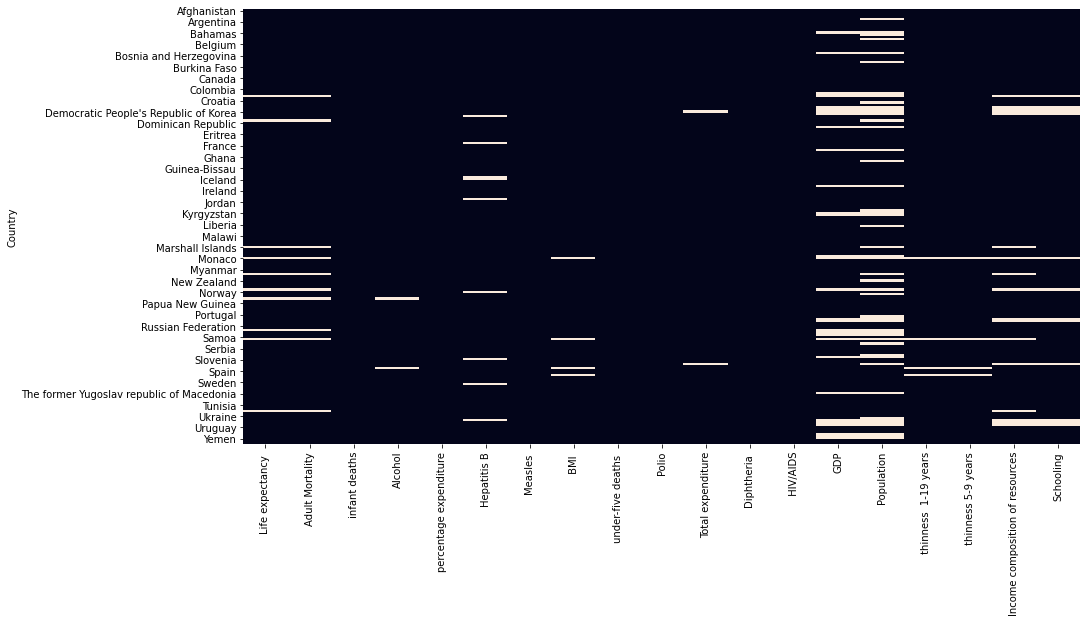

In [17]:
plt.rcParams['figure.figsize'] = [15,8]

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(life.isnull(),cbar=False)
plt.show()

###  Relationship between independent variable and dependent variable 

#### HIV/AIDS vs Life Expectancy 

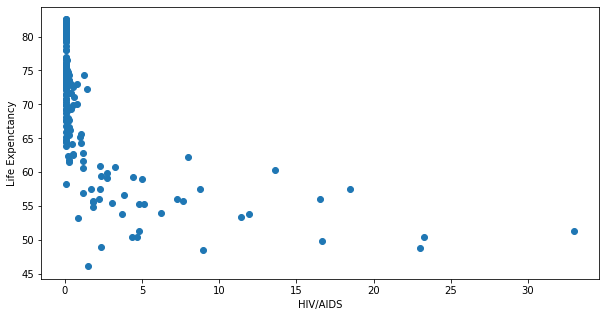

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(life[' HIV/AIDS'],life['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expenctancy')
plt.show()

#### Alcohol vs Life Expectancy 

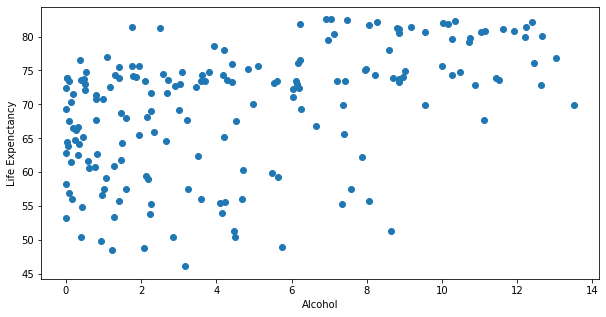

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(life['Alcohol'],life['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life Expenctancy')
plt.show()

#### percentage expenditure vs Life Expectancy 

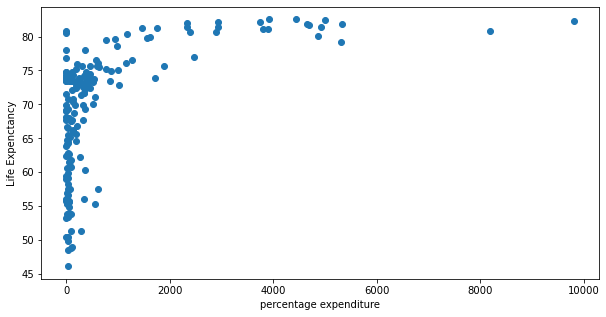

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(life['percentage expenditure'],life['Life expectancy '])
plt.xlabel('percentage expenditure')
plt.ylabel('Life Expenctancy')
plt.show()

#### Adult Mortality vs Life Expectancy

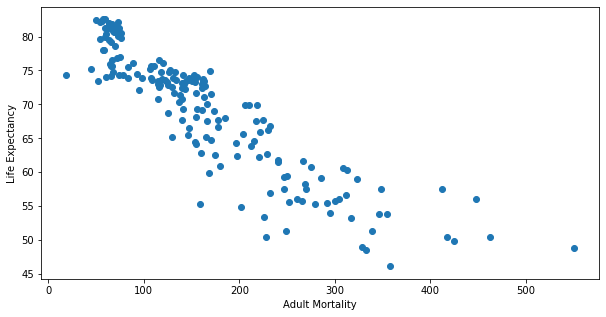

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(life['Adult Mortality'],life['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

#### infant deaths vs Life Expectancy 

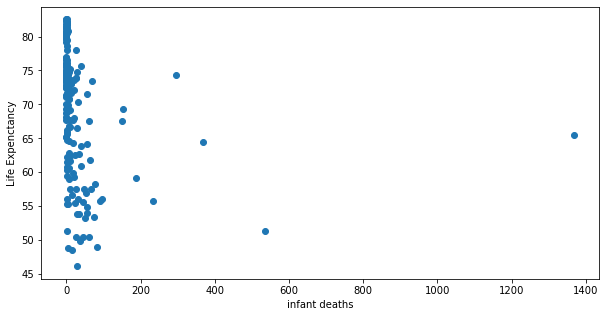

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(life['infant deaths'],life['Life expectancy '])
plt.xlabel('infant deaths')
plt.ylabel('Life Expenctancy')
plt.show()

#### Hepatitis B vs Life Expectancy 

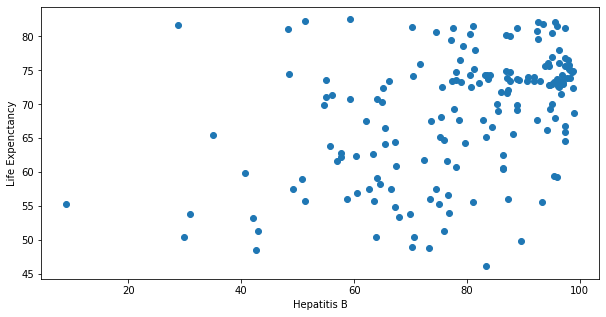

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(life['Hepatitis B'],life['Life expectancy '])
plt.xlabel('Hepatitis B')
plt.ylabel('Life Expenctancy')
plt.show()

#### Measles vs Life Expectancy 

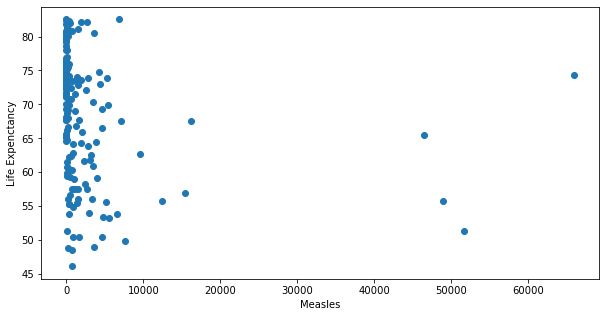

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(life['Measles '],life['Life expectancy '])
plt.xlabel('Measles')
plt.ylabel('Life Expenctancy')
plt.show()

#### BMI vs Life Expectancy 

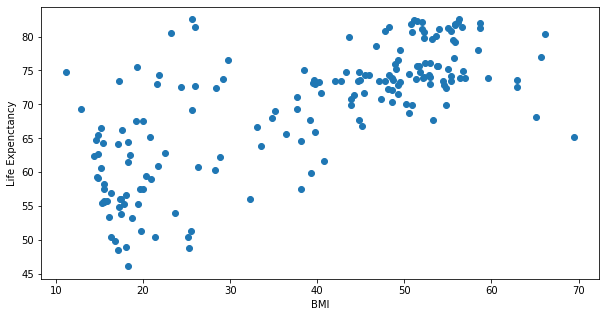

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(life[' BMI '],life['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life Expenctancy')
plt.show()

#### under-five deaths vs Life Expectancy 

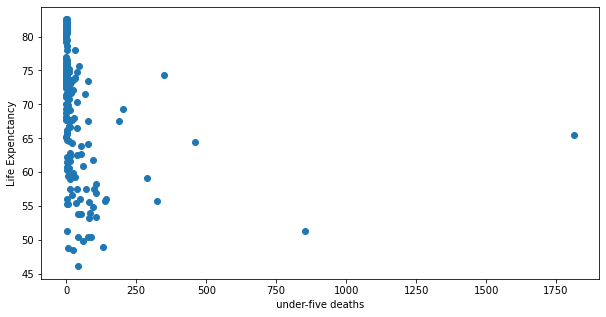

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(life['under-five deaths '],life['Life expectancy '])
plt.xlabel(' under-five deaths ')
plt.ylabel('Life Expenctancy')
plt.show()

#### Polio vs Life Expectancy 

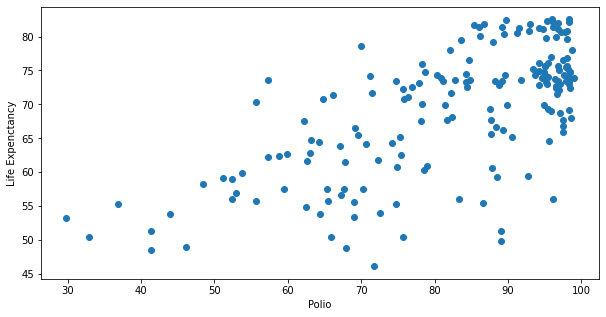

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(life['Polio'],life['Life expectancy '])
plt.xlabel('Polio')
plt.ylabel('Life Expenctancy')
plt.show()

#### Diphtheria vs Life Expectancy 

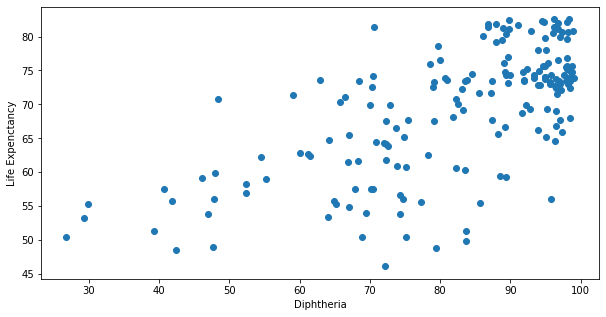

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(life['Diphtheria '],life['Life expectancy '])
plt.xlabel('Diphtheria')
plt.ylabel('Life Expenctancy')
plt.show()

#### thinness  1-19 years vs Life Expectancy 

In [29]:
#Renaming  thinness  1-19 years -> thinness-1-19-years
life.rename(columns={' thinness  1-19 years':'thinness-1-19-years'},inplace=True)

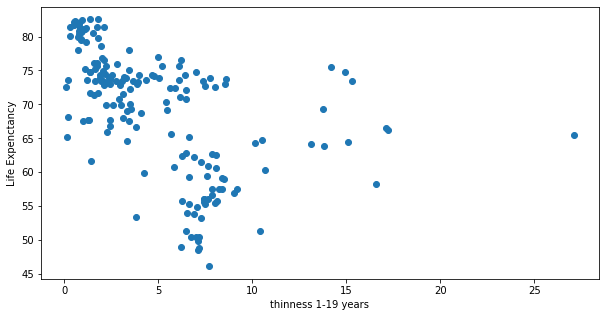

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(life['thinness-1-19-years'],life['Life expectancy '])
plt.xlabel('thinness 1-19 years')
plt.ylabel('Life Expenctancy')
plt.show()

In [31]:
#Renaming under-five-deaths{space} to under-five-deaths 
life.rename(columns={'under-five-deaths ':'under-five-deaths'},inplace=True)

In [32]:
# Renaming {space}thinness 5-9 years -> thinness-5-9-years 
life.rename(columns={' thinness 5-9 years':'thinness-5-9-years'},inplace=True)

#### thinness-5-9-years vs Life Expectancy 

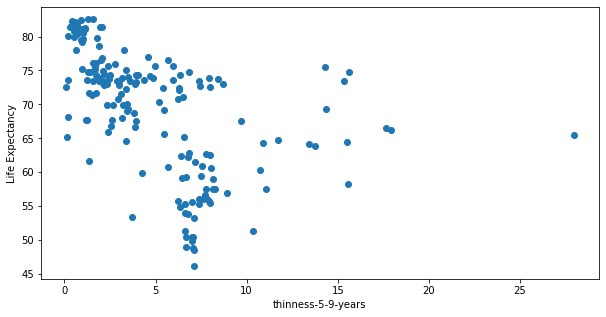

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(life['thinness-5-9-years'],life['Life expectancy '])
plt.xlabel('thinness-5-9-years')
plt.ylabel('Life Expectancy')
plt.show()

#### Schooling vs Life Expectancy 

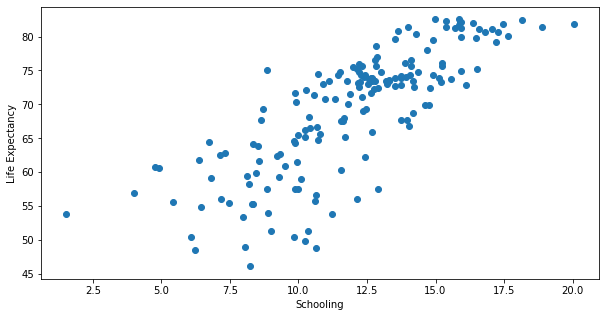

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(life['Schooling'],life['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

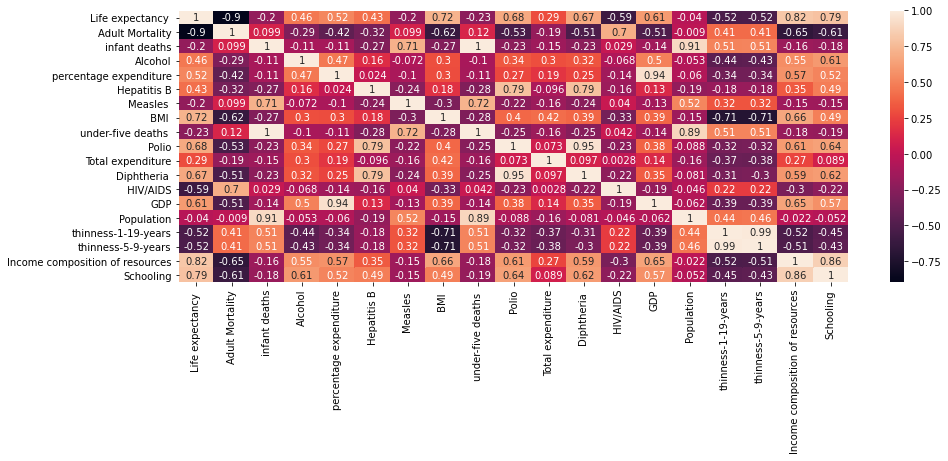

In [35]:
plt.rcParams['figure.figsize']=[15,5]
sns.heatmap(life.corr(),annot=True)
plt.show()

<a id='impute'></a>
## <b style="color:black">Imputing Missing Values with Mean or Median</b>

In [36]:
life.isnull().sum()

Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
thinness-1-19-years                 4
thinness-5-9-years                  4
Income composition of resources    17
Schooling                          13
dtype: int64

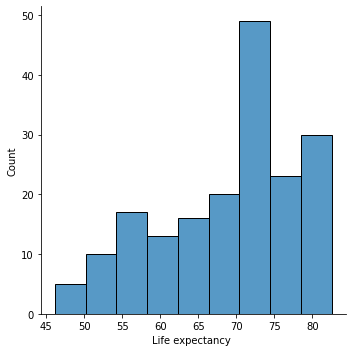

In [37]:
sns.displot(life['Life expectancy '])
plt.show()

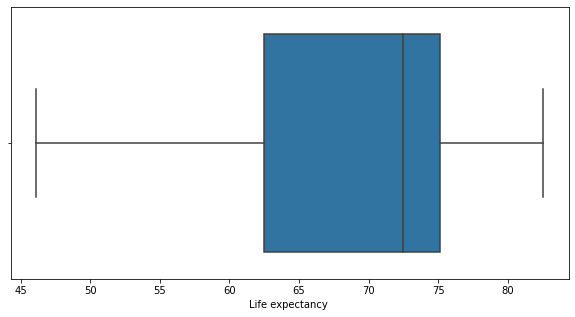

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Life expectancy '])
plt.show()

In [39]:
life['Life expectancy '].replace(np.nan,life['Life expectancy '].median(),inplace=True)

In [40]:
#Rename Life expectancy{space} with Life expectancy
life.rename(columns={'Life expectancy ':'Life expectancy'},inplace=True)

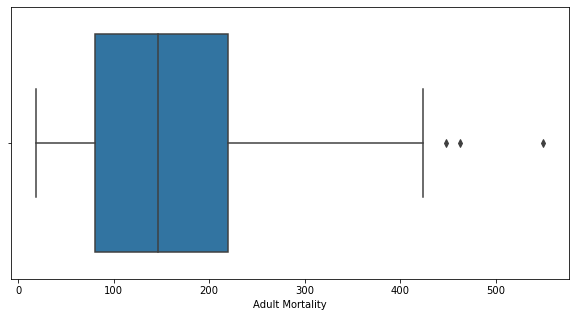

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(life['Adult Mortality'])
plt.show()

In [42]:
life['Adult Mortality'].replace(np.nan,life['Adult Mortality'].median(),inplace=True)
life['Adult Mortality'].isnull().sum()

0

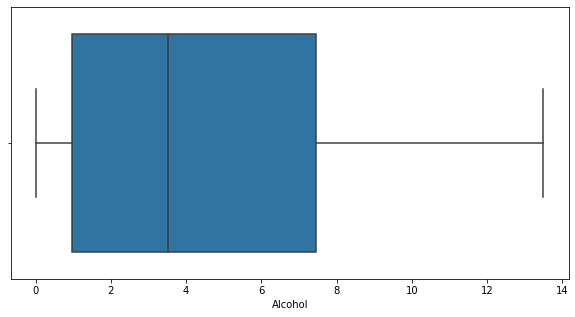

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Alcohol'],data=life)
plt.show()

<b>Observation:</b>Here we don't see any outlier. So, imputing the missing values with Mean.

In [44]:
life['Alcohol'].replace(np.nan,life['Alcohol'].mean(),inplace=True)
life['Alcohol'].isnull().sum()

0

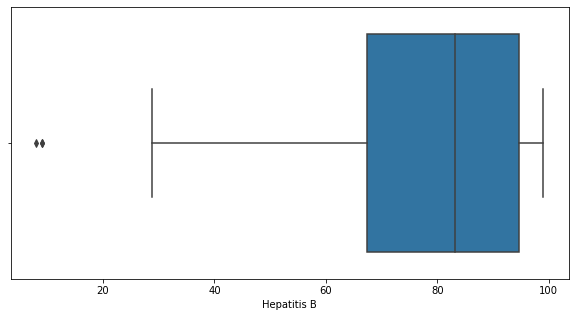

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x= life['Hepatitis B'],data=life)
plt.show()

In [46]:
life['Hepatitis B'].replace(np.nan,life['Hepatitis B'].median(),inplace=True)
life['Hepatitis B'].isnull().sum()

0

In [47]:
#Rename {space}BMI{space} with BMI
life.rename(columns={' BMI ':'BMI'},inplace=True)

In [48]:
# BMI
life['BMI'].replace(np.nan,life['BMI'].median(),inplace=True)

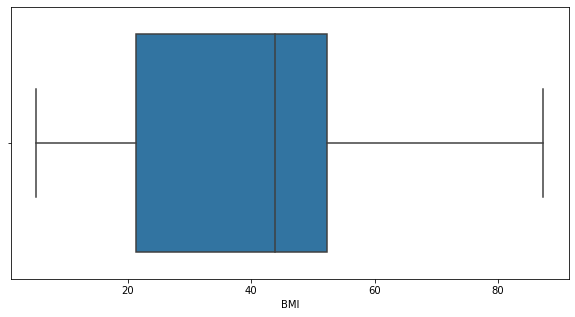

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['BMI'],data=life)
plt.show()

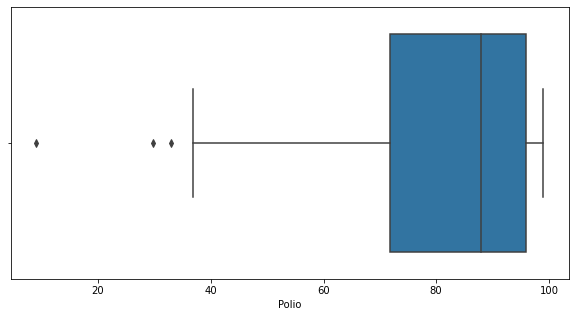

In [50]:
#Polio
plt.figure(figsize=(10,5))
sns.boxplot(life['Polio'])
plt.show()

In [51]:
# Since Polio has outlier
life['Polio'].replace(np.nan,life['Polio'].median(),inplace=True)
life['Polio'].isnull().sum()

0

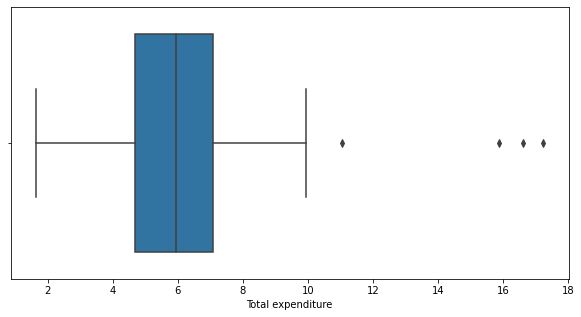

In [52]:
#Total expenditure
plt.figure(figsize=(10,5))
sns.boxplot(life['Total expenditure'])
plt.show()

In [53]:
life['Total expenditure'].replace(np.nan,life['Total expenditure'].median(),inplace=True)
life['Total expenditure'].isnull().sum()

0

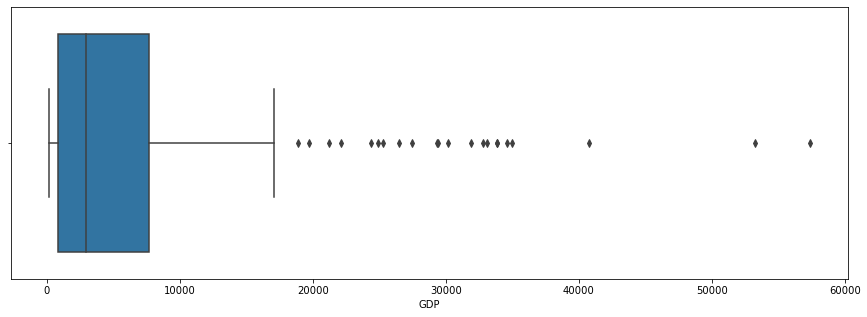

In [54]:
#GDP
sns.boxplot(x=life['GDP'],data=life)
plt.show()

In [55]:
life['GDP'].replace(np.nan,life['GDP'].median(),inplace=True)
life['GDP'].isnull().sum()

0

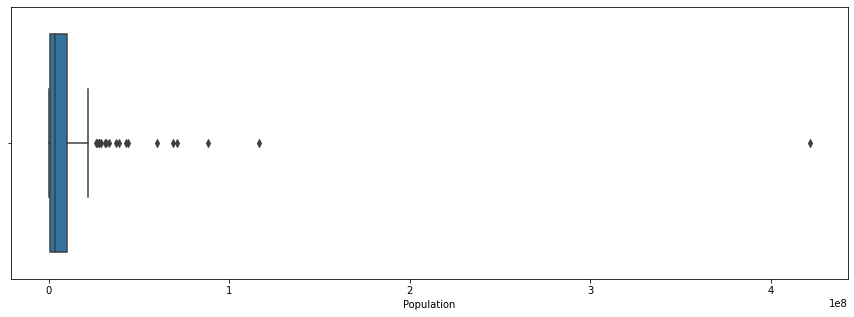

In [56]:
sns.boxplot(life['Population'])
plt.show()

In [57]:
life['Population'].replace(np.nan,life['Population'].median(),inplace=True)
life['Population'].isnull().sum()

0

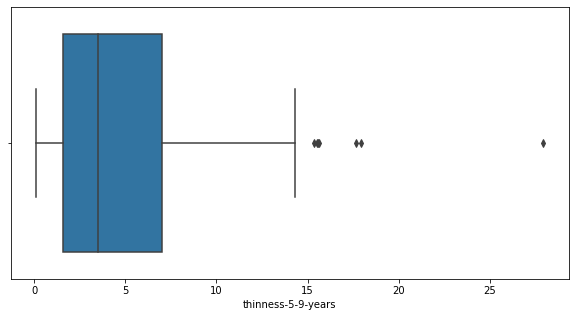

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['thinness-5-9-years'],data=life)
plt.show()

In [59]:
life['thinness-5-9-years'].replace(np.nan,life['thinness-5-9-years'].median(),inplace=True)
life['thinness-5-9-years'].isnull().sum()

0

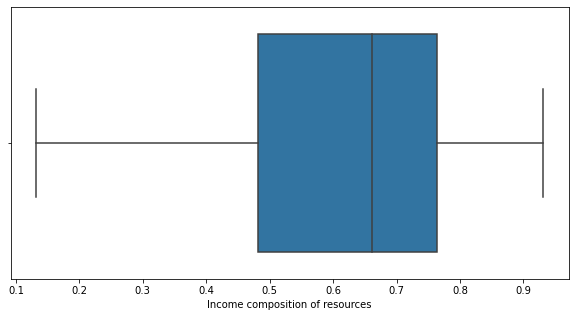

In [60]:
#Income composition of resources
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Income composition of resources'],data=life)
plt.show()

In [61]:
life['Income composition of resources'].replace(np.nan,life['Income composition of resources'].median(),inplace=True)
life['Income composition of resources'].isnull().sum()

0

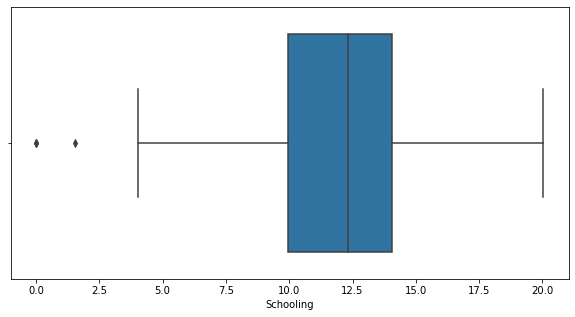

In [62]:
#Schooling   
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Schooling'],data=life)
plt.show()


In [63]:
life['Schooling'].replace(np.nan,life['Schooling'].median(),inplace=True)
life['Schooling'].isnull().sum()

0

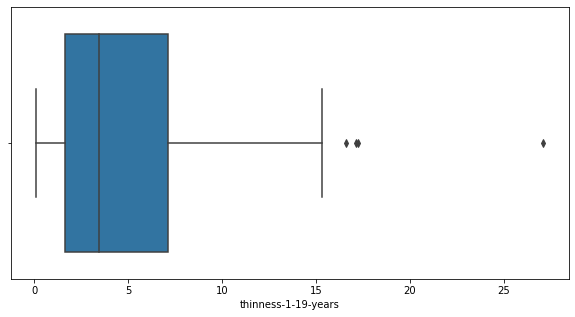

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['thinness-1-19-years'],data=life)
plt.show()

In [65]:
life['thinness-1-19-years'].replace(np.nan,life['thinness-1-19-years'].median(),inplace=True)
life['thinness-1-19-years'].isnull().sum()

0

In [66]:
life.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness-1-19-years                0
thinness-5-9-years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [67]:
df = life

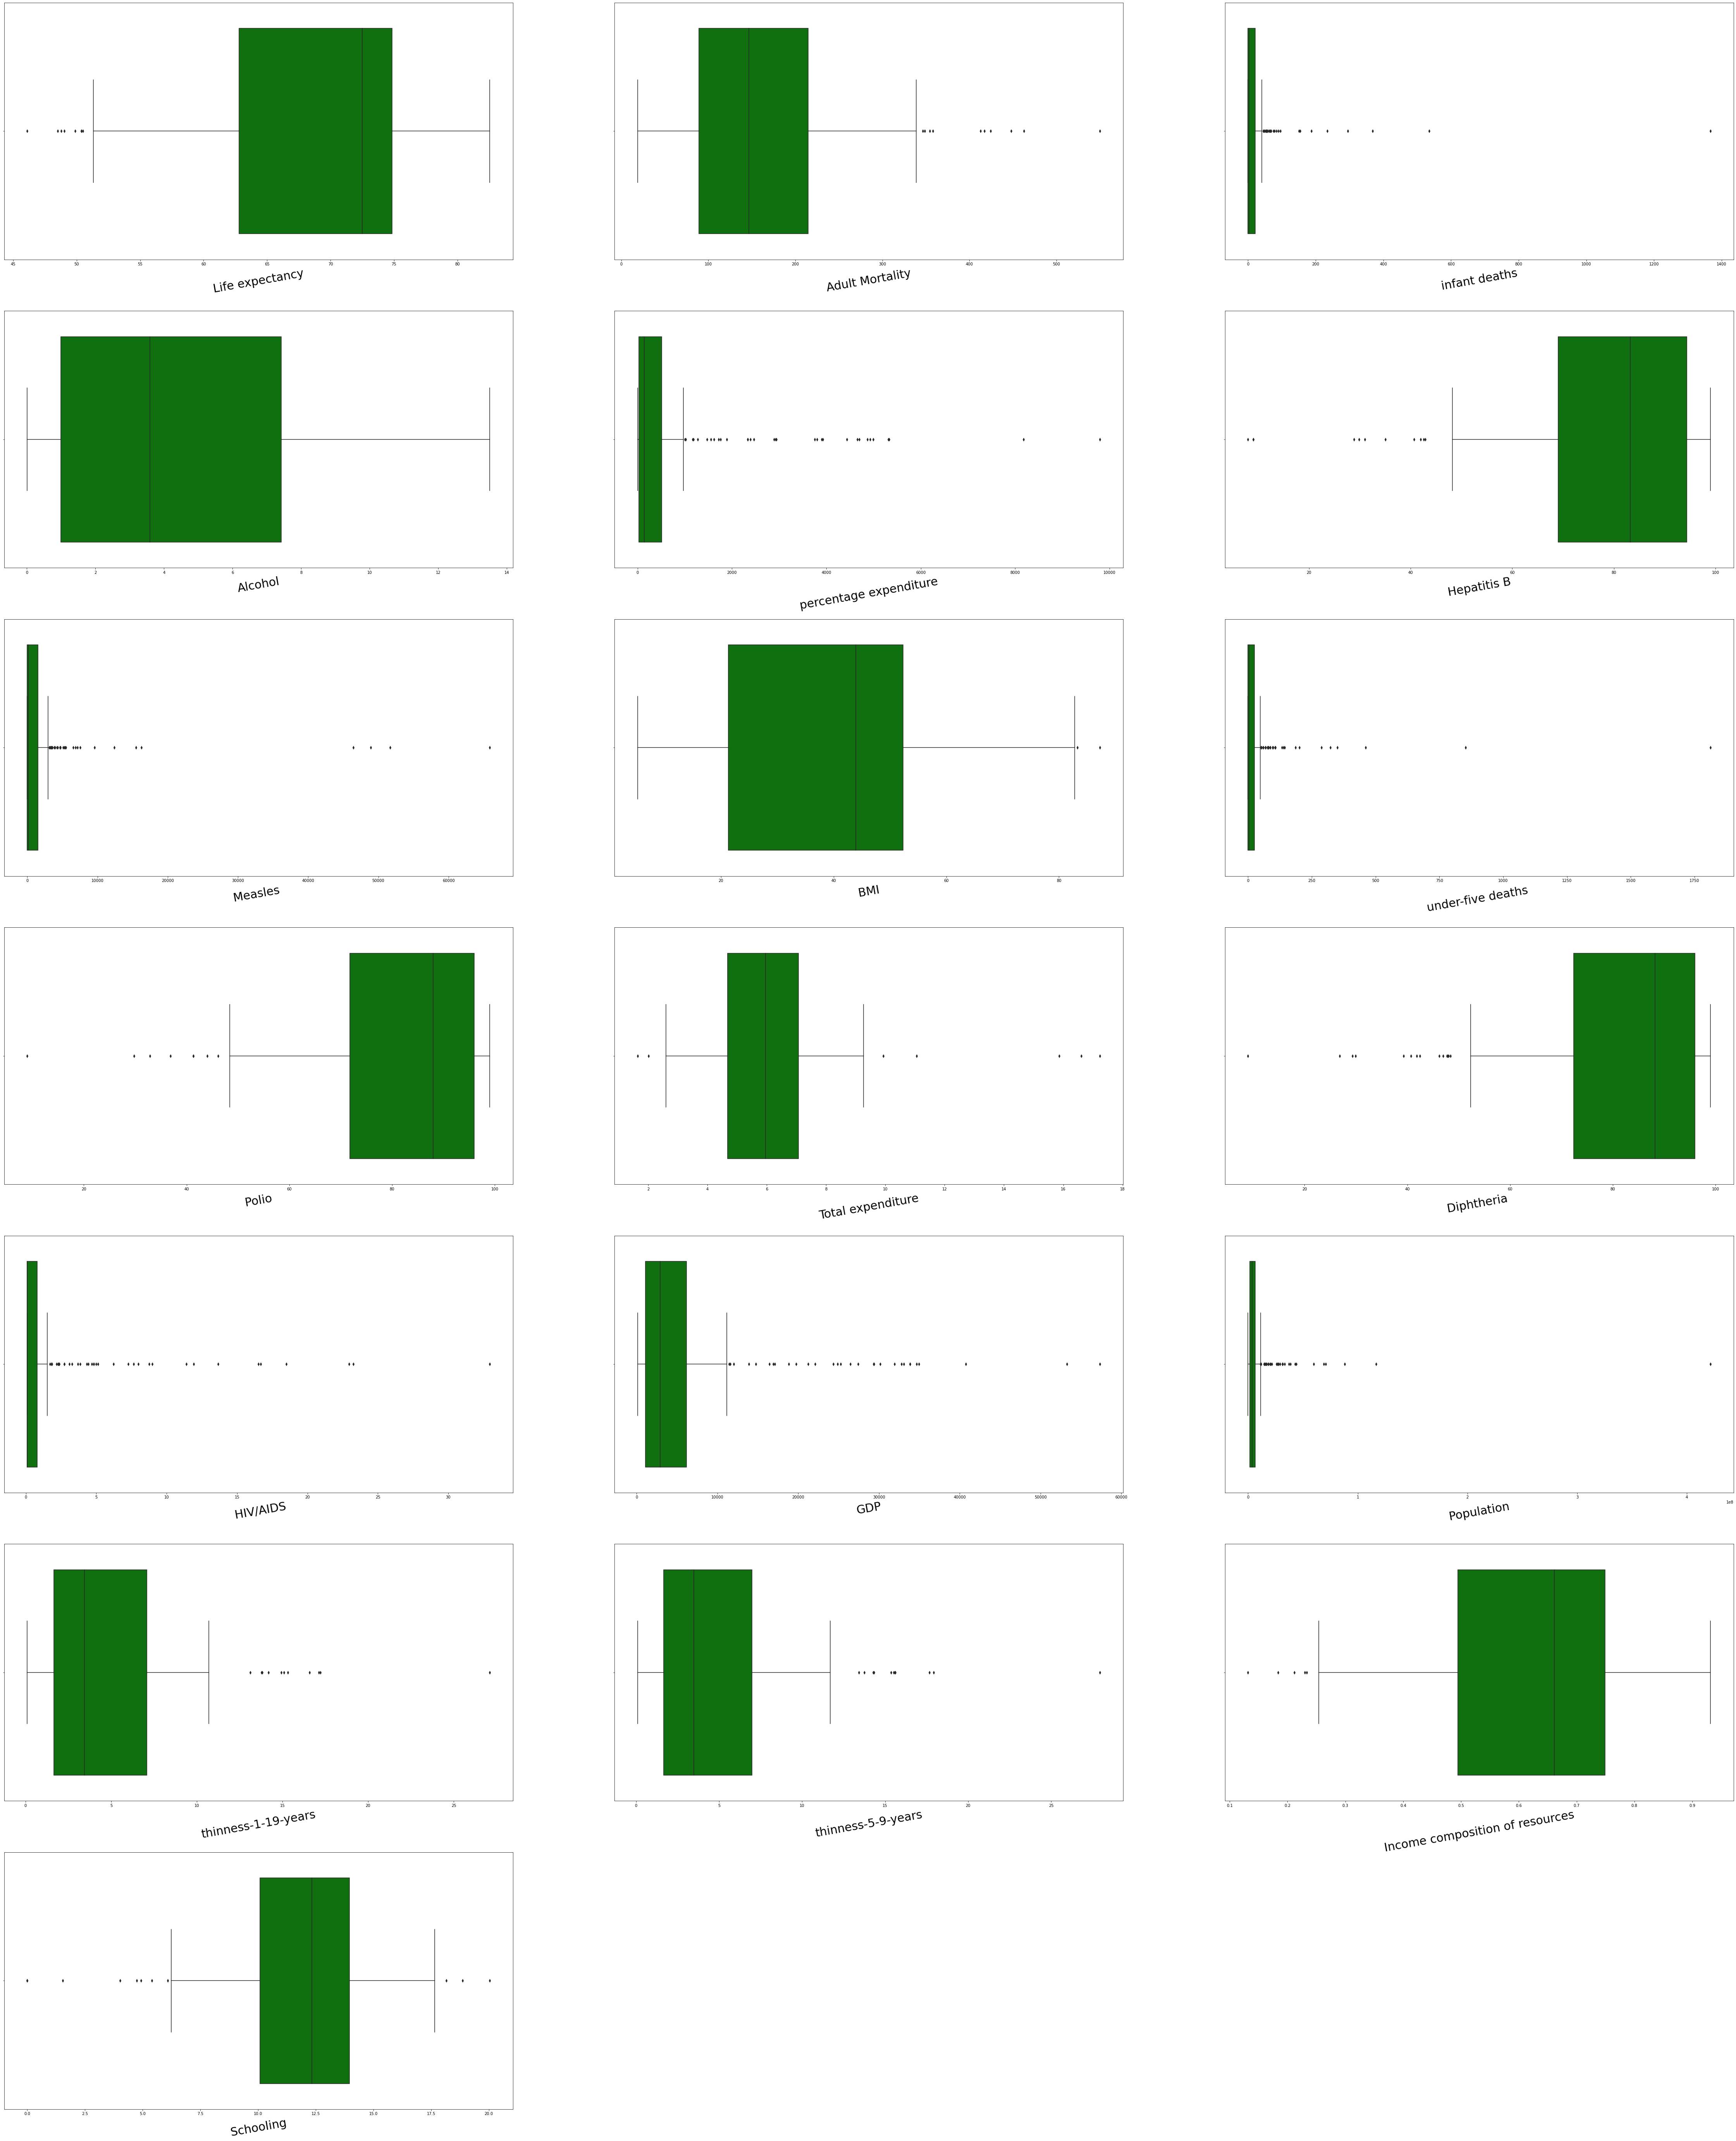

In [68]:
plt.figure(figsize=(80,100))
j=1
col = df.columns
for i in range(0,df.shape[1]):
    plt.subplot(7,3,j)
    sns.boxplot(x=df.iloc[:,i],color='g',whis=1.0,data=df)
    plt.xlabel(col[i],rotation=10,size=30)
    j=j+1
plt.show()

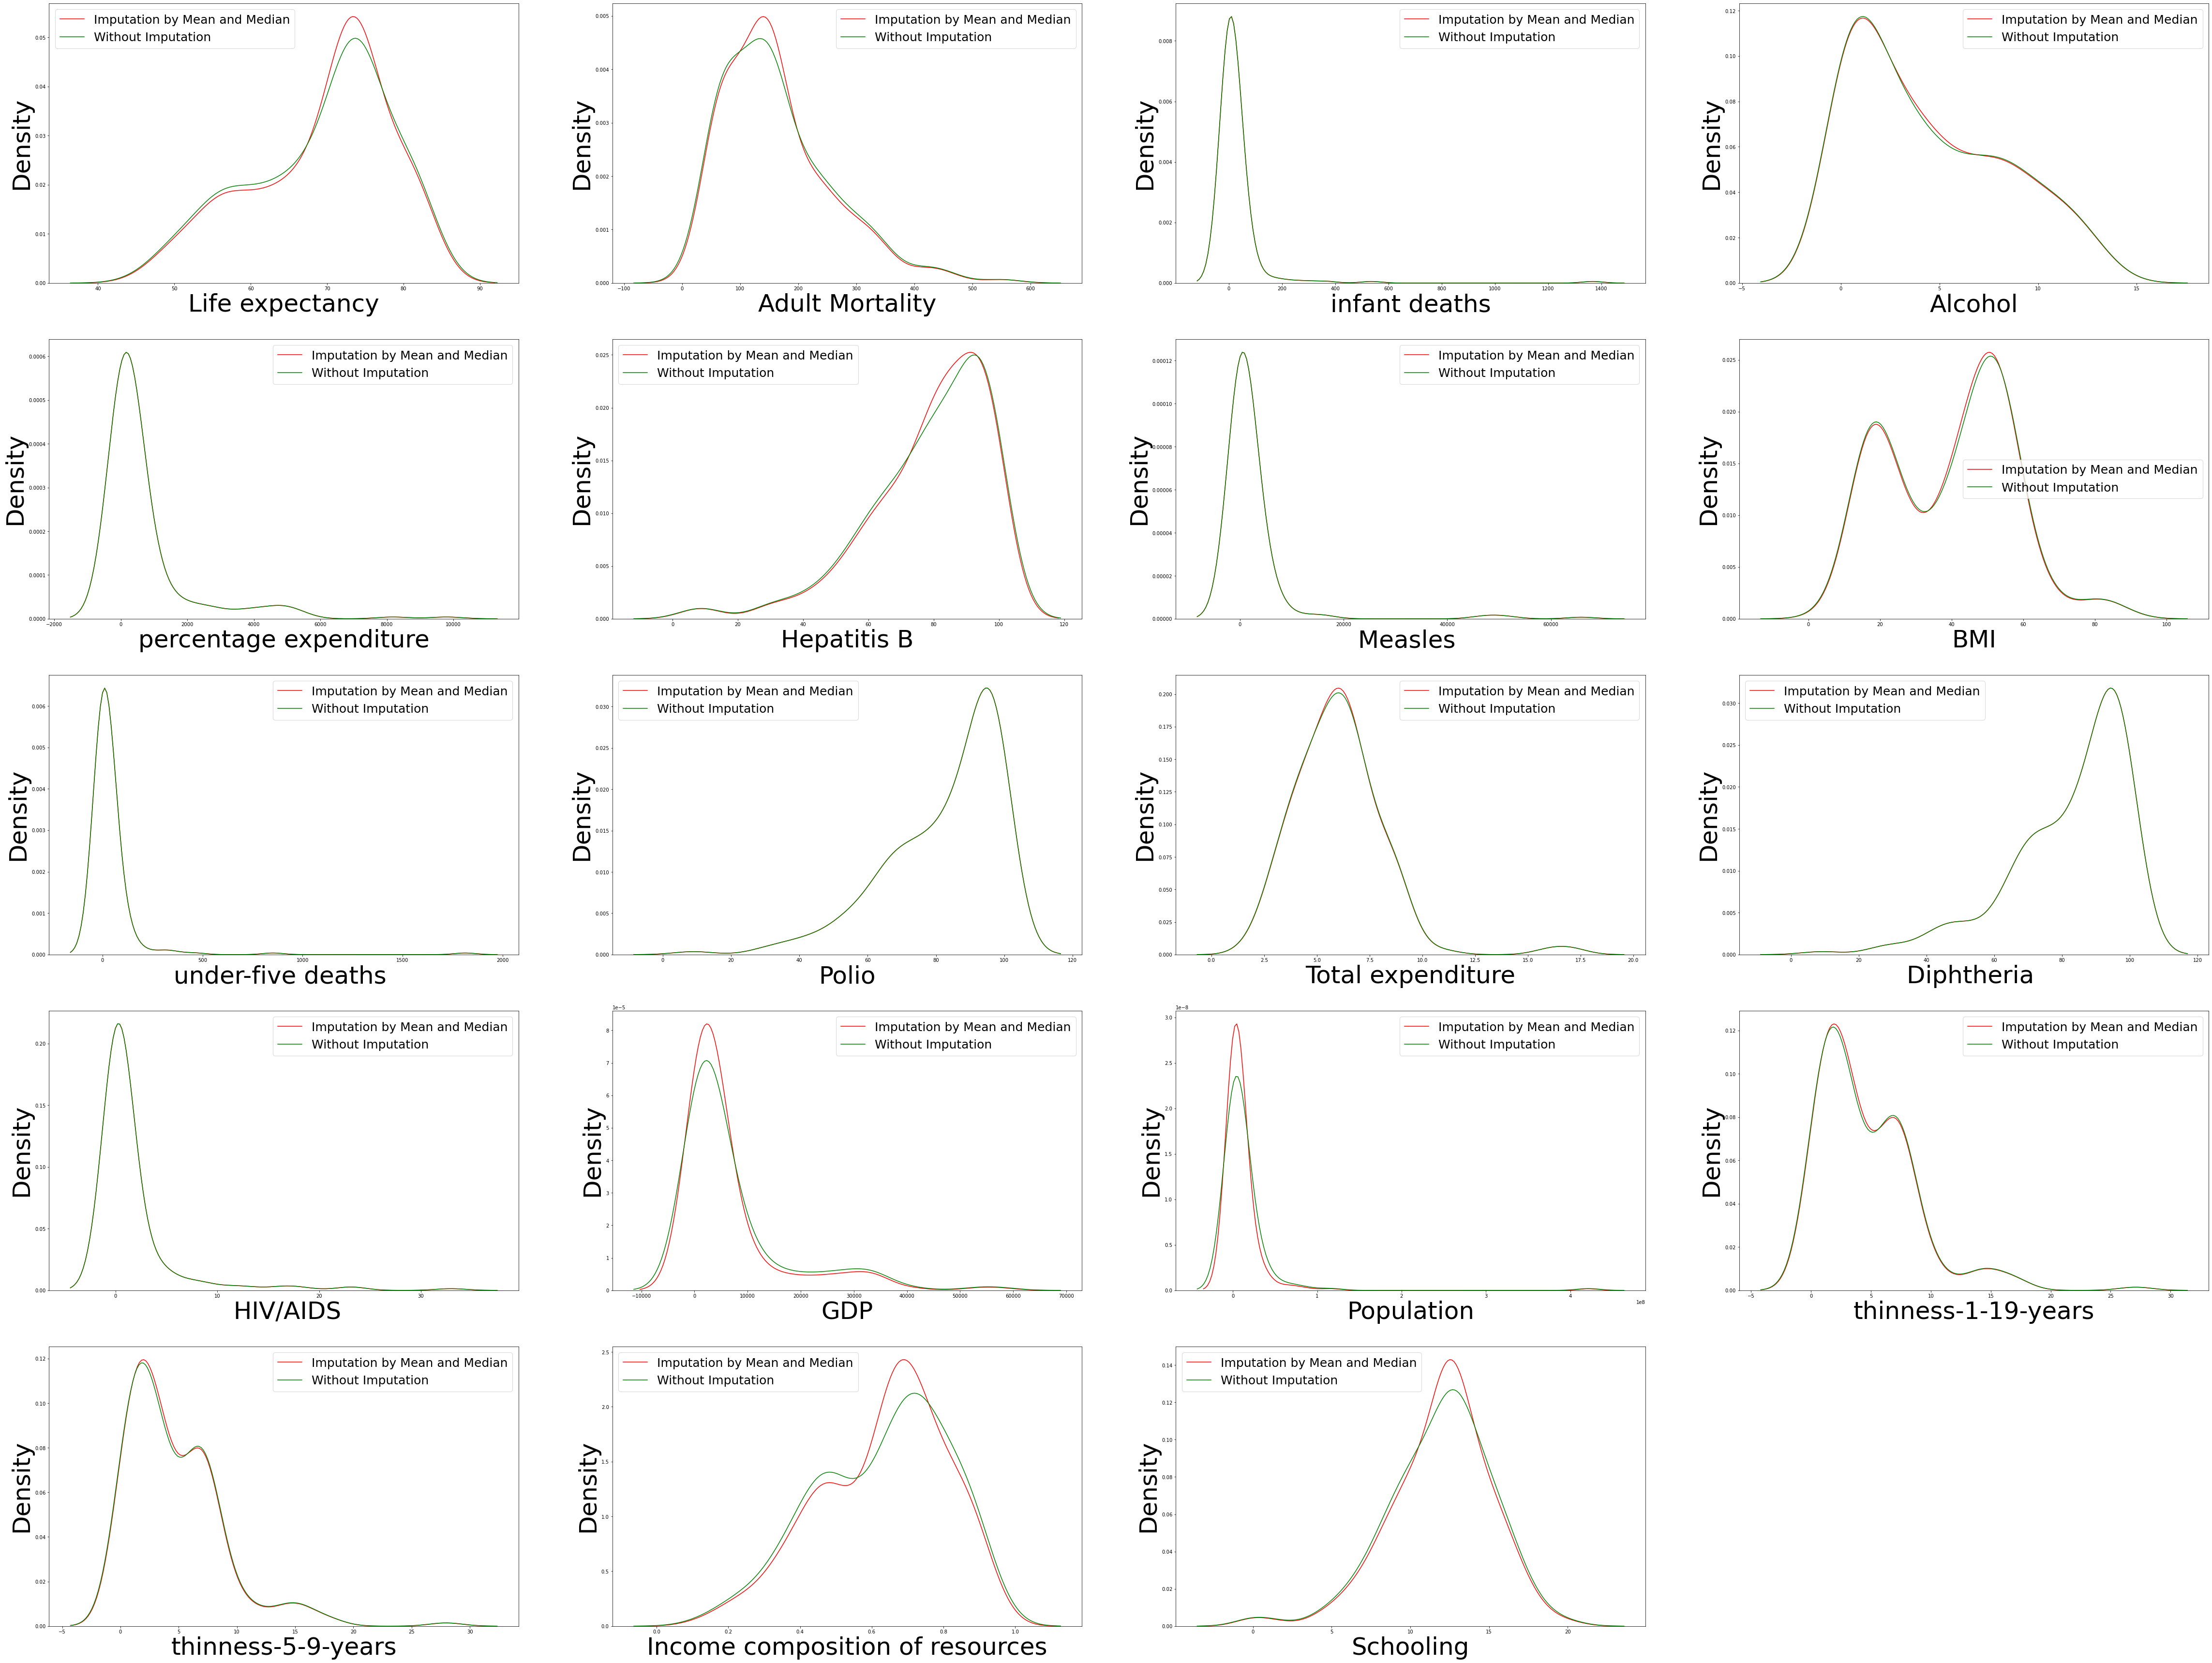

In [69]:
a= df.columns
j=1
plt.figure(figsize=(80,100))
for i in range(0,df.shape[1]):
    plt.subplot(8,4,j)
    sns.kdeplot(life.iloc[:,i],color='r',label='Imputation by Mean and Median')
    sns.kdeplot(life_copy.iloc[:,i],color='g',label='Without Imputation')
    plt.xlabel(a[i],size = 50)
    plt.ylabel('Density', size = 50)
    plt.legend(loc="best",prop={'size': 25})  
    j=j+1

<a id='visualisation'></a>
# <b style="color:black">Visualization after Handling Missing Values</b>

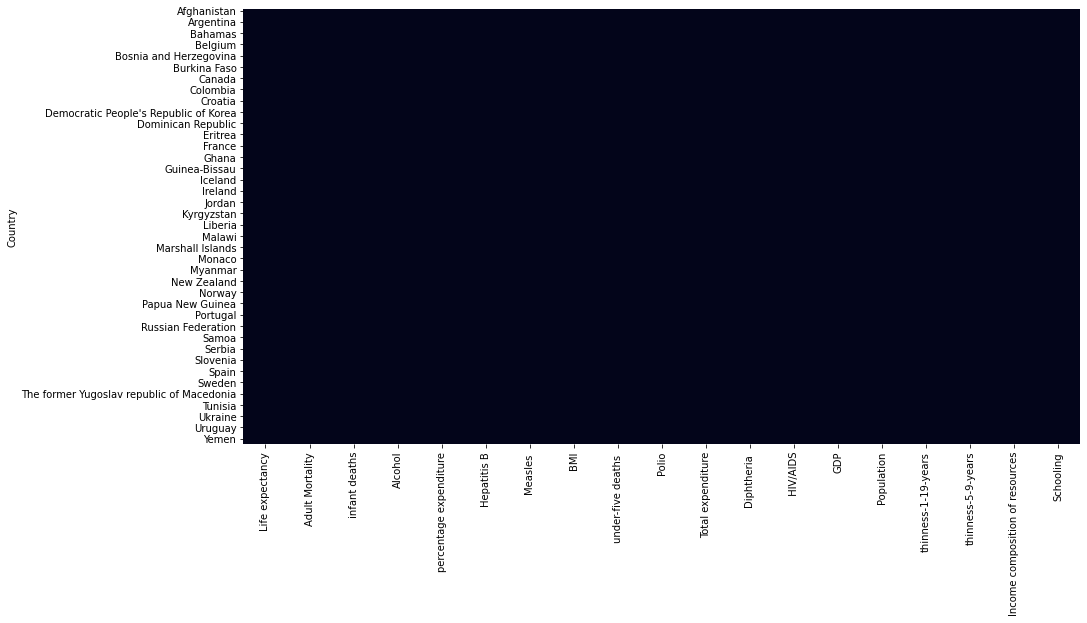

In [70]:
# set the figure size
plt.figure(figsize=(15, 8))
# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(life.isnull(), cbar=False)

# display the plot
plt.show()

<a id='outlier'></a>
# <b style="color:black">Outlier treatment</b>

<a id='iqr'></a>
## <b style="color:black">Treating with IQR</b>

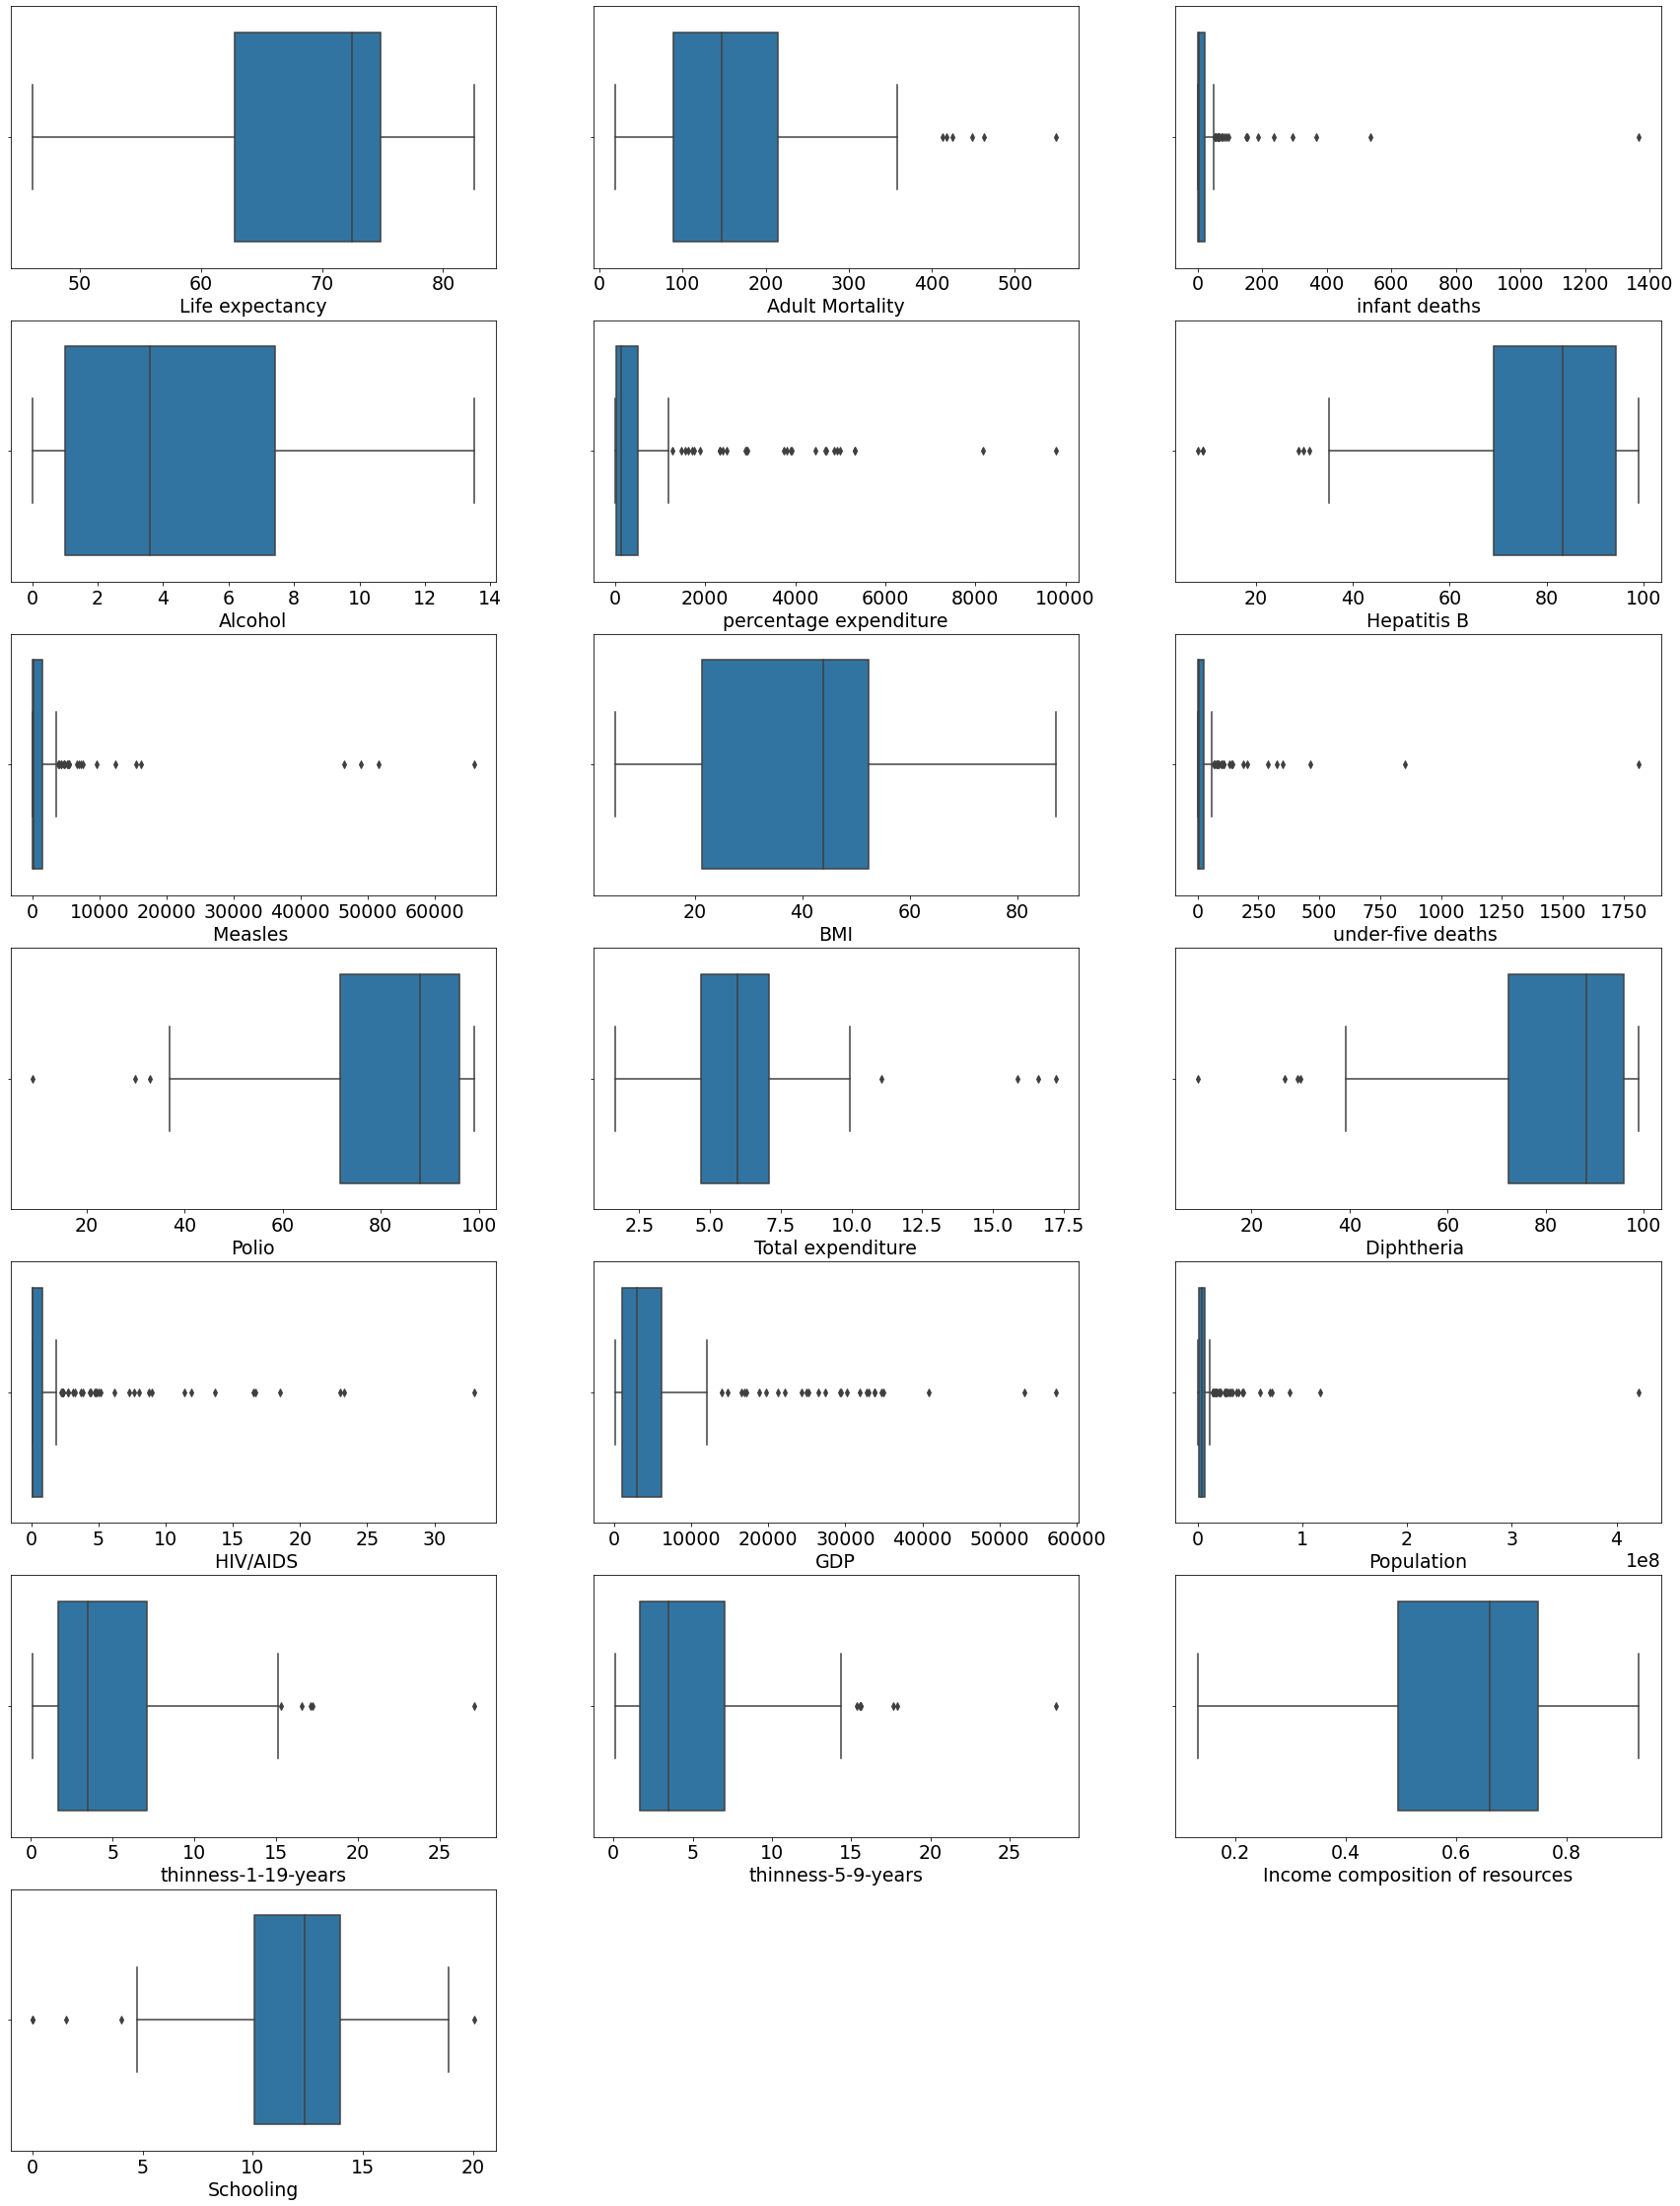

In [71]:
plt.rcParams.update({'font.size': 19})
plt.figure(figsize=(30,40))
a= life.columns
j=1
for i in range(0,life.shape[1]):
    plt.subplot(7,3,j)
    sns.boxplot(x=life.iloc[:,i])
    j=j+1

<b>Observation: </b> Outliers are present in independent and dependent numerical variables

In [72]:
l = list(life.columns)
outlier=pd.DataFrame(np.random.randint(0, 10, size=(19,5)), columns=['Q1','Q3','IQR','LCL','UCL'],index=l)
outlier

,Q1,Q3,IQR,LCL,UCL
Life expectancy,2,0,7,7,1
Adult Mortality,4,9,5,7,1
infant deaths,8,2,3,2,2
Alcohol,5,6,1,9,3
percentage expenditure,6,7,1,9,3
Hepatitis B,1,2,5,8,2
Measles,6,4,6,2,7
BMI,9,3,3,5,8
under-five deaths,0,0,6,2,3
Polio,1,4,7,5,3


In [73]:
def func_outlier_treatment(data):
    for i in l:
        outlier.at[i,'Q1']=data[i].quantile(0.25)
        outlier.at[i,'Q3']=data[i].quantile(0.75)
        outlier.at[i,'IQR']= outlier.at[i,'Q3'] - outlier.at[i,'Q1']
        outlier.at[i,'LCL'] = outlier.at[i,'Q1']-1.5* outlier.at[i,'IQR']
        outlier.at[i,'UCL'] =outlier.at[i,'Q3']+1.5* outlier.at[i,'IQR']         
    return outlier

In [74]:
out = func_outlier_treatment(life)

In [75]:
out

,Q1,Q3,IQR,LCL,UCL
Life expectancy,62,74,12,44,92
Adult Mortality,89,214,125,-98,401
infant deaths,0,20,20,-30,50
Alcohol,0,7,7,-10,17
percentage expenditure,26,508,482,-697,1231
Hepatitis B,69,94,25,31,131
Measles,3,1497,1494,-2238,3738
BMI,21,52,31,-25,98
under-five deaths,0,24,24,-36,60
Polio,71,96,25,33,133


In [76]:
life.head(3)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness-1-19-years,thinness-5-9-years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.250,15.51875,107.5625,48.375,8.252500,52.3125,0.1,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.2125
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.375,49.06875,0.9375,98.125,5.945625,98.0625,0.1,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.1375
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.0000,1943.875,48.74375,23.5000,91.750,4.604000,91.8750,0.1,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.7125


In [77]:
out.iloc[:,3][0]

44

In [78]:
life[(life['Life expectancy']<out.iloc[:,1][0])]
life=life[~((life['Life expectancy']<(out.at['Life expectancy','LCL']))|(life['Life expectancy']>(out.at['Life expectancy','UCL'])))]

In [79]:
life.shape

(193, 19)

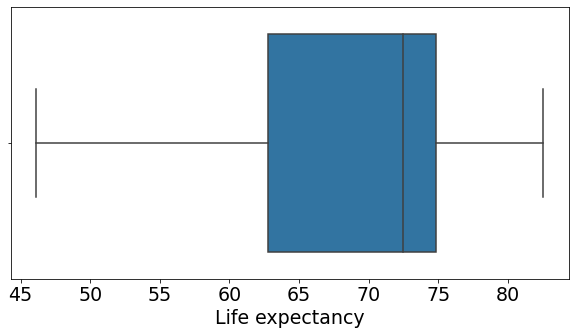

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Life expectancy'],data=life)
plt.show()

<AxesSubplot:>

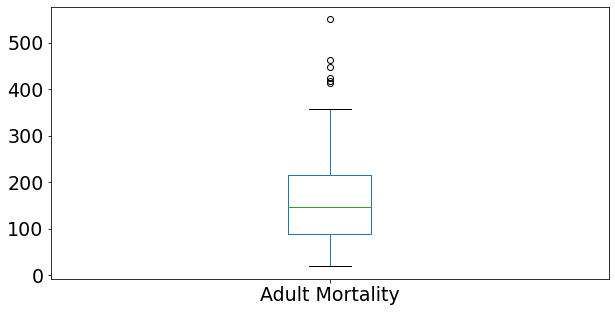

In [81]:
plt.figure(figsize=(10,5))
life['Adult Mortality'].plot(kind='box')

In [82]:
df_adult = life[((life['Adult Mortality']<(out.at['Adult Mortality','LCL']))|(life['Adult Mortality']>(out.at['Adult Mortality','UCL'])))]
life['Adult Mortality'].replace(df_adult['Adult Mortality'].values,out.at['Adult Mortality','UCL'],inplace=True)

<AxesSubplot:>

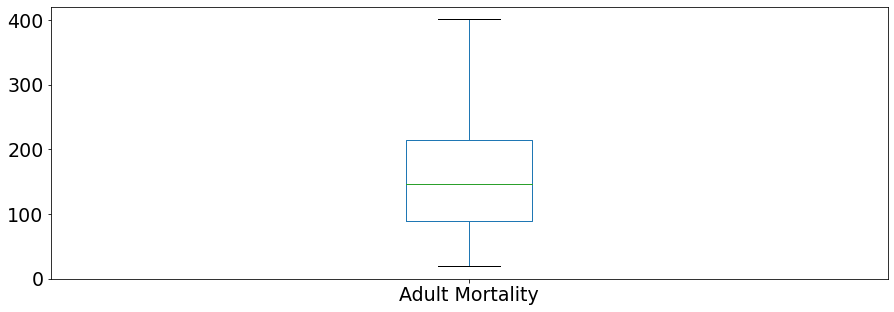

In [83]:
life['Adult Mortality'].plot(kind='box')

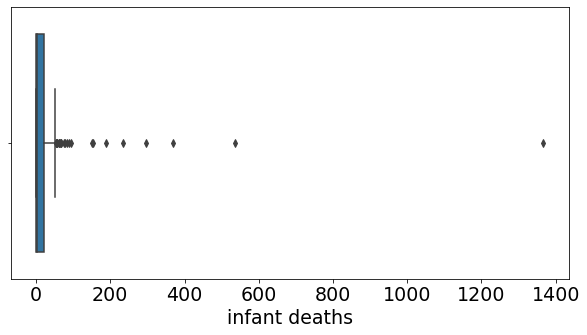

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['infant deaths'],data=life)
plt.show()

In [85]:
df_infant= life[((life['infant deaths']<(out.at['infant deaths','LCL']))|(life['infant deaths']>(out.at['infant deaths','UCL'])))]

In [86]:
life['infant deaths'].replace(df_infant['infant deaths'].values,out.at['infant deaths','UCL'],inplace=True)

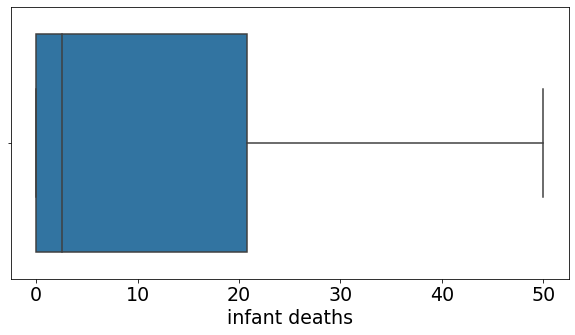

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['infant deaths'],data=life)
plt.show()

In [88]:
#z_score_infant_deaths = stats.zscore(life['infant deaths'])

In [89]:
#z_score_infant_deaths

In [90]:
# print the rows where z-score is greater than 3
#row_index_greater = np.where(z_score_infant_deaths > 3)

# print the values
#print(row_index_greater)

In [91]:
# print the rows where z-score is less than -3
#row_index_less = np.where(z_score_infant_deaths < -3)

# print the values
#print(row_index_less)

In [92]:
#life=life[~(z_score_infant_deaths > 3)]

In [93]:
#life.shape

In [94]:
#life.shape

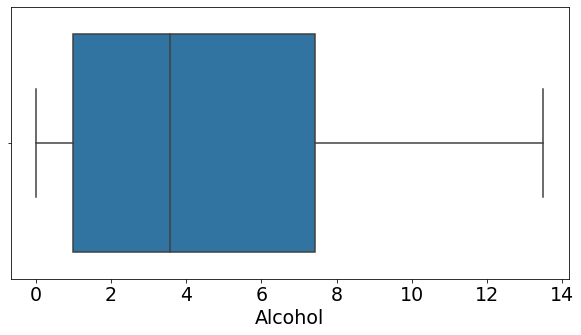

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Alcohol'],data=life)
plt.show()

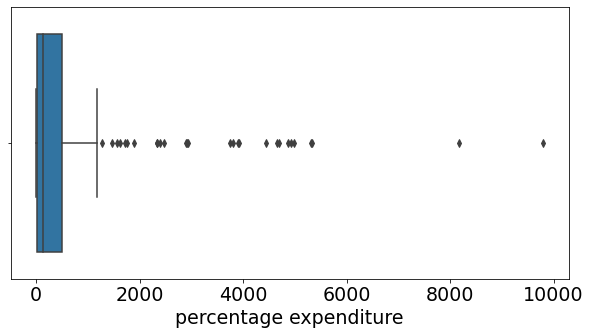

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['percentage expenditure'],data=life)
plt.show()


In [97]:
df_per_ex= life[((life['percentage expenditure']<(out.at['percentage expenditure','LCL']))|(life['percentage expenditure']>(out.at['percentage expenditure','UCL'])))]

In [98]:
life['percentage expenditure'].replace(df_per_ex['percentage expenditure'].values,out.at['percentage expenditure','UCL'],inplace=True)

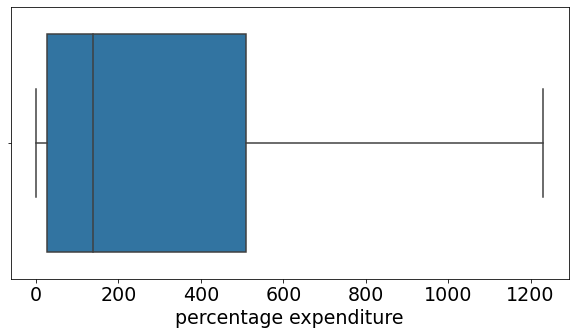

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['percentage expenditure'],data=life)
plt.show()


In [100]:
df_hep_b= life[((life['Hepatitis B']<(out.at['Hepatitis B','LCL']))|(life['Hepatitis B']>(out.at['Hepatitis B','UCL'])))]

In [101]:
life['Hepatitis B'].replace(df_hep_b['Hepatitis B'].values,out.at['Hepatitis B','LCL'],inplace=True)

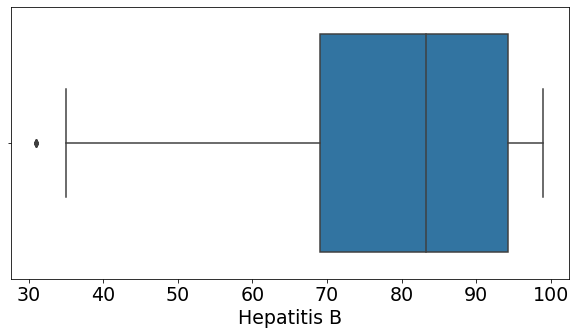

In [102]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Hepatitis B'],data=life)
plt.show()


In [103]:
df_meas= life[((life['Measles ']<(out.at['Measles ','LCL']))|(life['Measles ']>(out.at['Measles ','UCL'])))]

In [104]:
life['Measles '].replace(df_meas['Measles '].values,out.at['Measles ','UCL'],inplace=True)

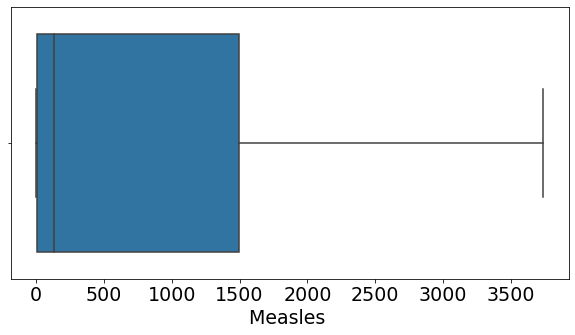

In [105]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Measles '],data=life)
plt.show()

In [106]:
df_bmi= life[((life['BMI']<(out.at['BMI','LCL']))|(life['BMI']>(out.at['BMI','UCL'])))]

In [107]:
life['BMI'].replace(df_bmi['BMI'].values,out.at['BMI','UCL'],inplace=True)

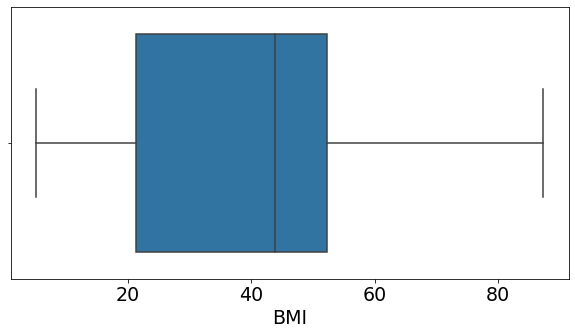

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['BMI'],data=life)
plt.show()

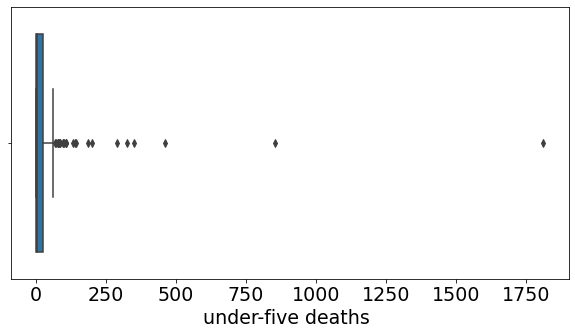

In [109]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['under-five deaths '],data=life)
plt.show()

In [110]:
df_u_five_death = life[((life['under-five deaths ']<(out.at['under-five deaths ','LCL']))|(life['under-five deaths ']>(out.at['under-five deaths ','UCL'])))]

In [111]:
life['under-five deaths '].replace(df_u_five_death['under-five deaths '].values,out.at['under-five deaths ','UCL'],inplace=True)

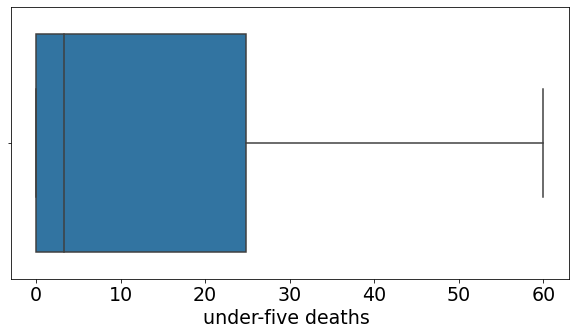

In [112]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['under-five deaths '],data=life)
plt.show()

In [113]:
df_polio = life[((life['Polio']<(out.at['Polio','LCL']))|(life['Polio']>(out.at['Polio','UCL'])))]

In [114]:
life['Polio'].replace(df_polio['Polio'].values,out.at['Polio','LCL'],inplace=True)

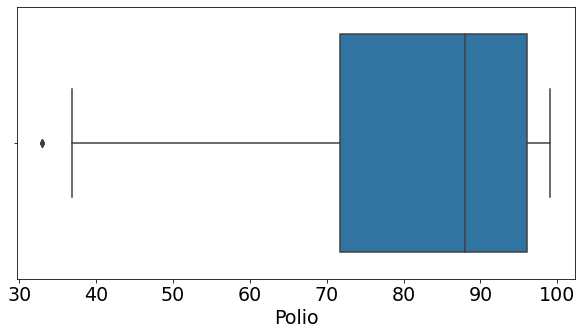

In [115]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Polio'],data=life)
plt.show()

In [116]:
df_expend = life[((life['Total expenditure']<(out.at['Total expenditure','LCL']))|(life['Total expenditure']>(out.at['Total expenditure','UCL'])))]

In [117]:
life['Total expenditure'].replace(df_expend['Total expenditure'].values,out.at['Total expenditure','UCL'],inplace=True)

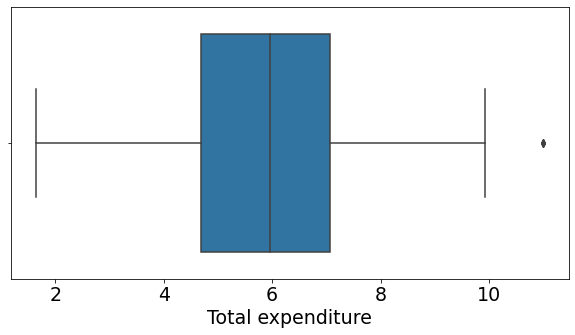

In [118]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Total expenditure'],data=life)
plt.show()

In [119]:
df_gdp= life[((life['GDP']<(out.at['GDP','LCL']))|(life['GDP']>(out.at['GDP','UCL'])))]

In [120]:
life['GDP'].replace(df_gdp['GDP'].values,out.at['GDP','UCL'],inplace=True)

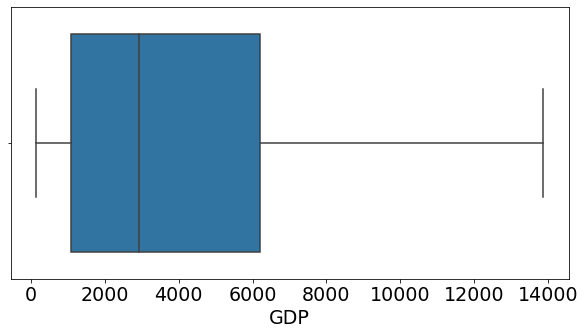

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['GDP'],data=life)
plt.show()

In [122]:
df_t_one_nineteen= life[((life['thinness-1-19-years']<(out.at['thinness-1-19-years','LCL']))|(life['thinness-1-19-years']>(out.at['thinness-1-19-years','UCL'])))]

In [123]:
life['thinness-1-19-years'].replace(df_t_one_nineteen['thinness-1-19-years'].values,out.at['thinness-1-19-years','UCL'],inplace=True)

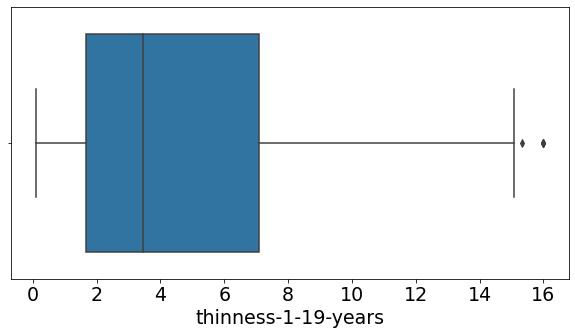

In [124]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['thinness-1-19-years'],data=life)
plt.show()

In [125]:
df_t_five_nine= life[((life['thinness-5-9-years']<(out.at['thinness-5-9-years','LCL']))|(life['thinness-5-9-years']>(out.at['thinness-5-9-years','UCL'])))]

In [126]:
life['thinness-5-9-years'].replace(df_t_five_nine['thinness-5-9-years'].values,out.at['thinness-5-9-years','UCL'],inplace=True)

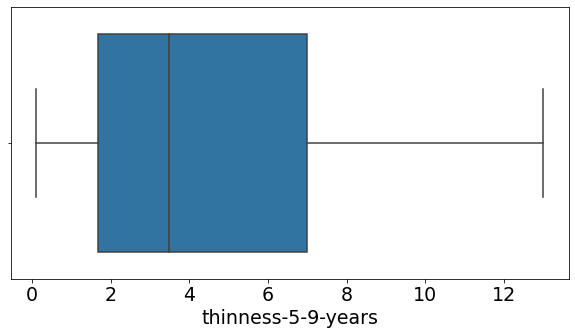

In [127]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['thinness-5-9-years'],data=life)
plt.show()


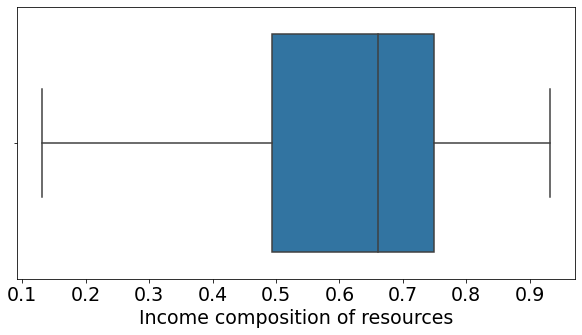

In [128]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Income composition of resources'],data=life)
plt.show()

In [129]:
df_school= life[((life['Schooling']<(out.at['Schooling','LCL']))|(life['Schooling']>(out.at['Schooling','UCL'])))]

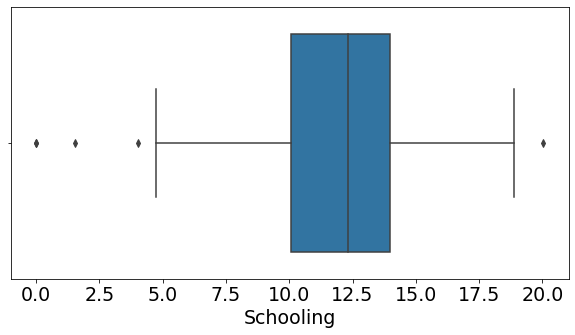

In [130]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Schooling'],data=life)
plt.show()

In [131]:
life['Schooling'].replace(df_school['Schooling'].values,out.at['Schooling','UCL'],inplace=True)

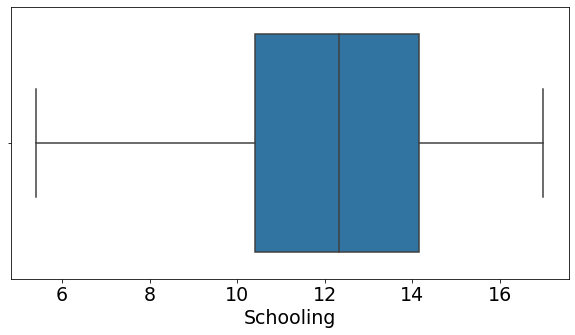

In [132]:
plt.figure(figsize=(10,5))
sns.boxplot(x=life['Schooling'],data=life)
plt.show()

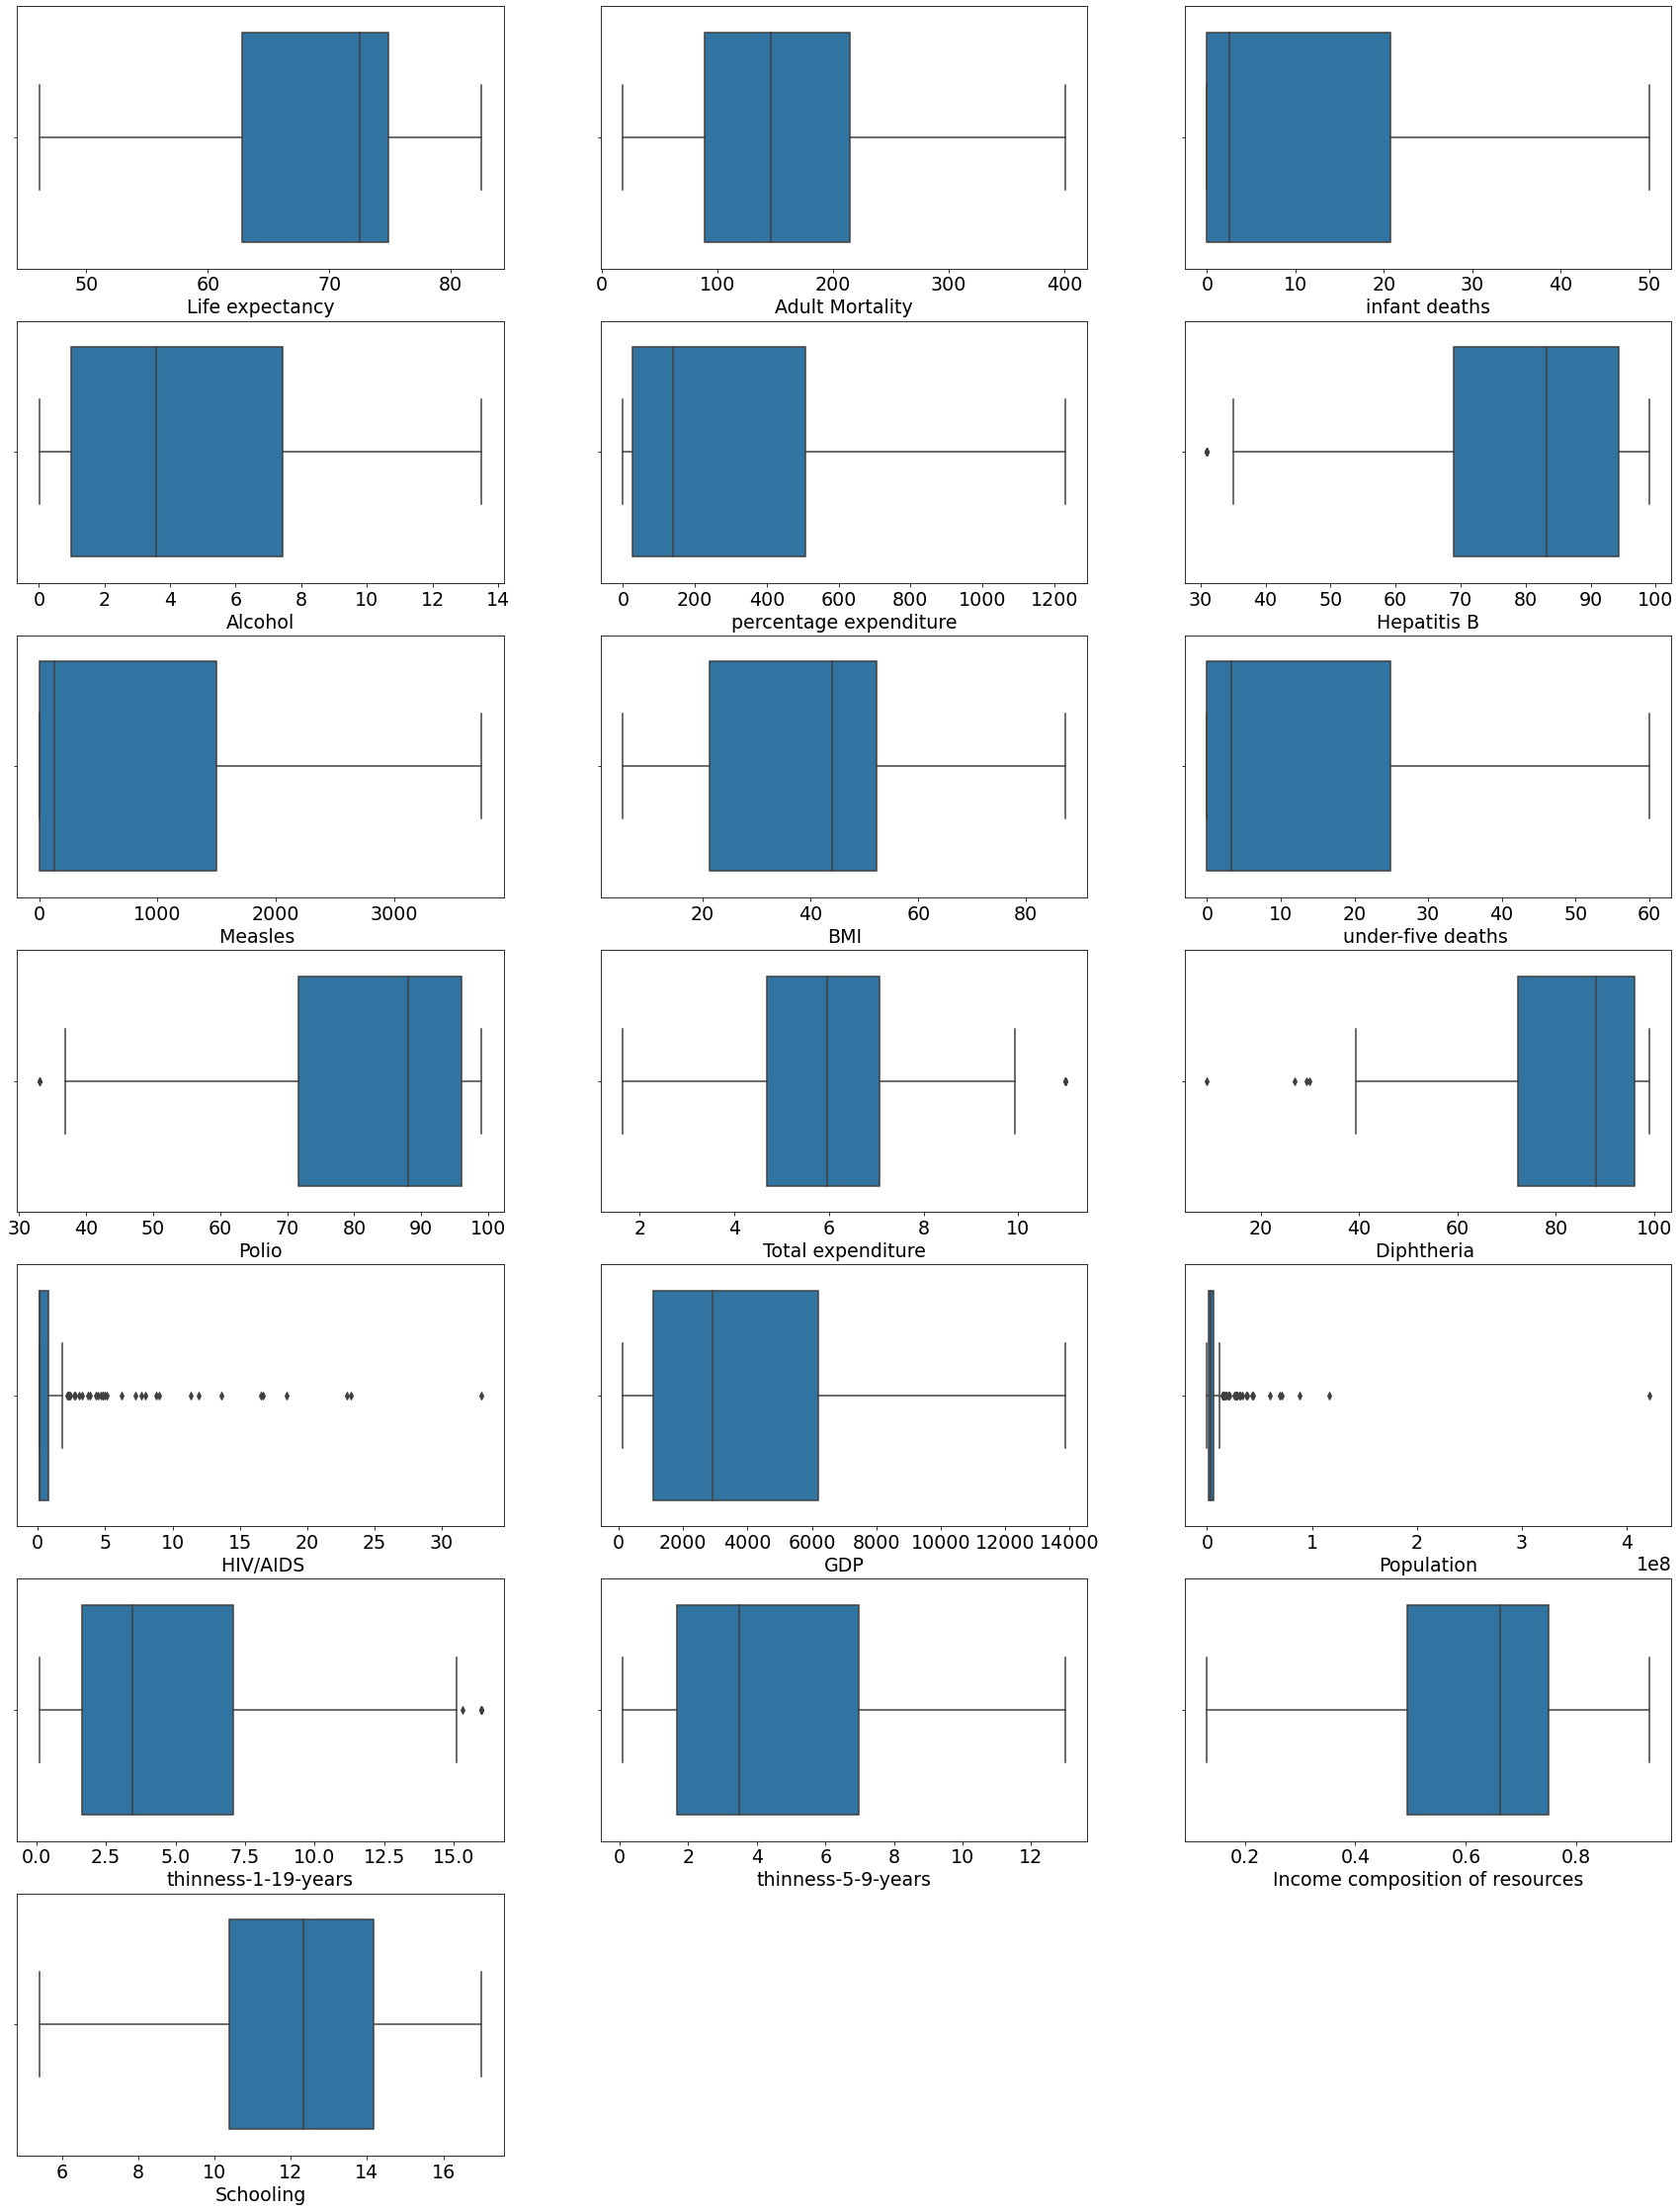

In [133]:
plt.rcParams.update({'font.size': 19})
plt.figure(figsize=(30,40))
a=life.columns
j=1
for i in range(0,life.shape[1]):
    plt.subplot(7,3,j)
    sns.boxplot(x=life.iloc[:,i])
    j=j+1

In [134]:
life.std()

Life expectancy                    8.973341e+00
Adult Mortality                    8.870298e+01
infant deaths                      1.767136e+01
Alcohol                            3.859423e+00
percentage expenditure             4.346039e+02
Hepatitis B                        1.719626e+01
Measles                            1.358079e+03
BMI                                1.742951e+01
under-five deaths                  2.213021e+01
Polio                              1.619086e+01
Total expenditure                  1.863236e+00
Diphtheria                         1.718669e+01
 HIV/AIDS                          4.345711e+00
GDP                                4.516239e+03
Population                         3.327578e+07
thinness-1-19-years                3.760563e+00
thinness-5-9-years                 3.496712e+00
Income composition of resources    1.747881e-01
Schooling                          2.765476e+00
dtype: float64

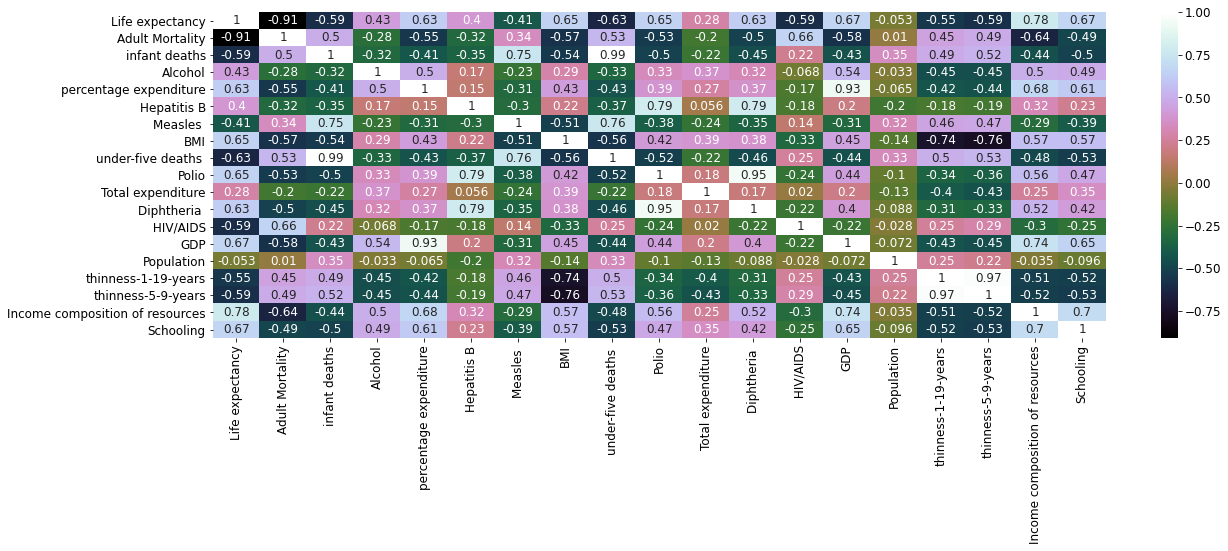

In [135]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(20,6))
sns.heatmap(life.corr(),cmap='cubehelix',annot=True)
plt.show()

<a id='feature_ext'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;"> Feature Extraction
<a id='corr_feat'></a>
# <b style="color:black">ExtraTreesRegressor </b>


In [136]:
A = life.iloc[:,1:]
b = life['Life expectancy']

[0.45942067 0.00714248 0.00754545 0.05300894 0.00576426 0.00424
 0.07358468 0.00818316 0.01656397 0.00490165 0.03035004 0.08271672
 0.02810407 0.00309914 0.03644519 0.03559849 0.1200748  0.02325631]


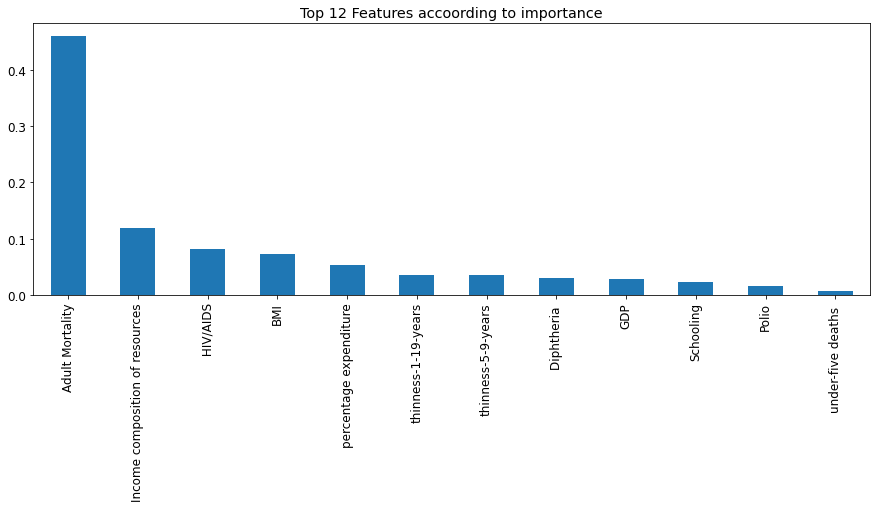

In [137]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(A,b)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=A.columns)
feat_importance.nlargest(12).plot(kind='bar')
plt.title('Top 12 Features accoording to importance')
plt.show()

In [138]:
model.feature_importances_

array([0.45942067, 0.00714248, 0.00754545, 0.05300894, 0.00576426,
       0.00424   , 0.07358468, 0.00818316, 0.01656397, 0.00490165,
       0.03035004, 0.08271672, 0.02810407, 0.00309914, 0.03644519,
       0.03559849, 0.1200748 , 0.02325631])

In [139]:
feat_importance.nlargest(12)

Adult Mortality                    0.459421
Income composition of resources    0.120075
 HIV/AIDS                          0.082717
BMI                                0.073585
percentage expenditure             0.053009
thinness-1-19-years                0.036445
thinness-5-9-years                 0.035598
Diphtheria                         0.030350
GDP                                0.028104
Schooling                          0.023256
Polio                              0.016564
under-five deaths                  0.008183
dtype: float64

In [140]:
feat_importance.nlargest(12).sum()

0.9673070258370378

In [141]:
A.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', 'BMI', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'thinness-1-19-years', 'thinness-5-9-years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [142]:
def correlated(df,threshold):
    cor_col= set()
    corr_matrix =df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j]>threshold):
             #if((corr_matrix.iloc[i,j]>threshold[0])|(corr_matrix.iloc[i,j]<threshold[1])):
                colname = corr_matrix.columns[i]
                cor_col.add(colname)
    return cor_col

In [143]:
correlated_features= correlated(life,0.80)

In [144]:
print("Number of correlated features:",len(correlated_features))
print("Correlated Features: ",correlated_features)

Number of correlated features: 4
Correlated Features:  {'Diphtheria ', 'thinness-5-9-years', 'GDP', 'under-five deaths '}


In [145]:
df_filter_fea = life.drop(correlated_features,axis=1)

In [146]:
df_filter_fea.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI', 'Polio',
       'Total expenditure', ' HIV/AIDS', 'Population', 'thinness-1-19-years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<a id='assump'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;"> Assumptions for Linear Regression


## <a id="linearity">1. Linearity</a>

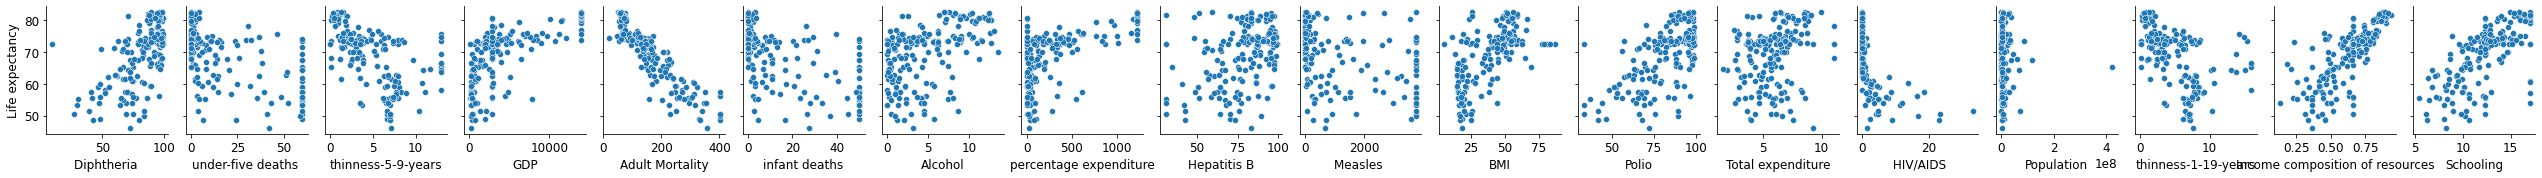

In [147]:
#visualizing the relationship between the features and the response variables using scatterplots

p = sns.pairplot(life, x_vars=['Diphtheria ', 'under-five deaths ', 'thinness-5-9-years', 'GDP','Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI', 'Polio',
       'Total expenditure', ' HIV/AIDS', 'Population', 'thinness-1-19-years',
       'Income composition of resources', 'Schooling'], y_vars='Life expectancy', aspect=0.8)

### By looking at the plots we can see that with the Life expectancy response variable,  independent variables Adult Mortality, Polio,Income composition of resources,Diptheria,Schooling forms a linear shape. 

## <a id='model'> 2.Modelling</a>
<a id='linear'></a>


In [148]:
X=life.drop('Life expectancy',axis=1)
X = X[feat_importance.nlargest(12).index]
y=life['Life expectancy']

In [149]:
y.head(2)

Country
Afghanistan    58.19375
Albania        75.15625
Name: Life expectancy, dtype: float64

In [150]:
X.head()

,Adult Mortality,Income composition of resources,HIV/AIDS,BMI,percentage expenditure,thinness-1-19-years,thinness-5-9-years,Diphtheria,GDP,Schooling,Polio,under-five deaths
Country,,,,,,,,,,,,
Afghanistan,269.0625,0.415375,0.10000,15.51875,34.960110,16.00000,13.00000,52.3125,340.015425,8.21250,48.3750,60.0000
Albania,45.0625,0.709875,0.10000,49.06875,193.259091,1.61875,1.70000,98.0625,2119.726679,12.13750,98.1250,0.9375
Algeria,108.1875,0.694875,0.10000,48.74375,236.185241,6.09375,5.97500,91.8750,2847.853392,12.71250,91.7500,23.5000
Angola,328.5625,0.458375,2.36875,18.01875,102.100268,6.19375,6.66875,47.6875,1975.143045,8.04375,46.1250,60.0000
Antigua and Barbuda,127.5000,0.488625,0.12500,38.42500,1001.585226,3.42500,3.37500,98.3125,9759.305728,8.84375,96.9375,0.0000


In [151]:
X.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=193)

<a id='datascaling'></a>
## <b style="color:black">Data scaling </b>

In [152]:
min_max_sc= MinMaxScaler()
X = min_max_sc.fit_transform(X)

In [153]:
X

array([[6.54839765e-01, 3.54720225e-01, 4.33680869e-19, ...,
        2.42048518e-01, 2.32954545e-01, 1.00000000e+00],
       [6.88358404e-02, 7.22960300e-01, 4.33680869e-19, ...,
        5.80592992e-01, 9.86742424e-01, 1.56250000e-02],
       [2.33976455e-01, 7.04204439e-01, 4.33680869e-19, ...,
        6.30188679e-01, 8.90151515e-01, 3.91666667e-01],
       ...,
       [5.05068672e-01, 4.29899969e-01, 4.33680869e-19, ...,
        2.67385445e-01, 5.17045455e-01, 8.60416667e-01],
       [8.77861347e-01, 4.58580807e-01, 3.60228354e-01, ...,
        5.00808625e-01, 4.75378788e-01, 8.72916667e-01],
       [1.00000000e+00, 3.84417005e-01, 7.05233111e-01, ...,
        3.81132075e-01, 6.45833333e-01, 6.80208333e-01]])

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=40)

In [155]:
X_train.shape

(173, 12)

In [156]:
X_test.shape

(20, 12)

In [157]:
y_train.shape

(173,)

In [158]:
y_test.shape

(20,)

<a id='linear_reg'></a>
### <b style="color:black">Linear Regression Model</b>

In [159]:
lm = LinearRegression()

In [160]:
model = lm.fit(X_train,y_train)
model

LinearRegression()

In [161]:
y_pred_train = model.predict(X_train)

In [162]:
y_pred_test  = model.predict(X_test)


In [163]:
#print("R squared score on training data from model:",model.score(X_train,y_train))
print("R squared score on training data:",r2_score(y_true=y_train,y_pred=y_pred_train))
print("R squared score on test data:",r2_score(y_test,y_pred_test))

R squared score on training data: 0.9349138687196559
R squared score on test data: 0.9139166613006179


## <a id="meanr">3. Mean of Residuals</a>

#### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [164]:
residuals = y_train.values-y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.5935871761556004e-14


#### The mean value of residuals is almost zero. So, it passes the residuals test

## <a id="homo">3. Check for Homoscedasticity</a>

#### Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

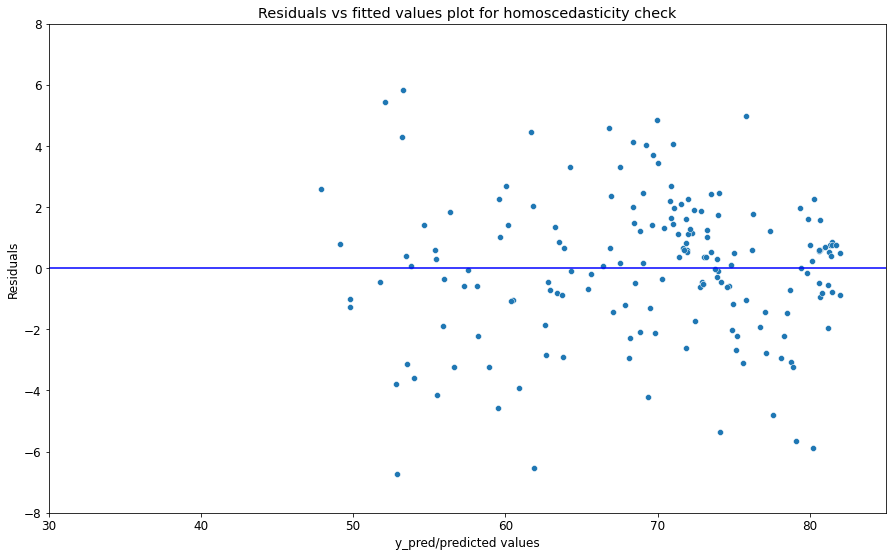

In [165]:
plt.figure(figsize=(15,9))
p = sns.scatterplot(x=y_pred_train,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-8,8)
plt.xlim(30,85)
p = sns.lineplot([0,85],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()


##  Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.
* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [166]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1286497000706497), ('p-value', 0.30119701225583445)]

#### The p value is more than 0.05 in Goldfeld Quandt Test, so we fail to reject the null hypothesis that error terms are homoscedastic.

## <a id="normal">4. Check for Normality of error terms/residuals</a>

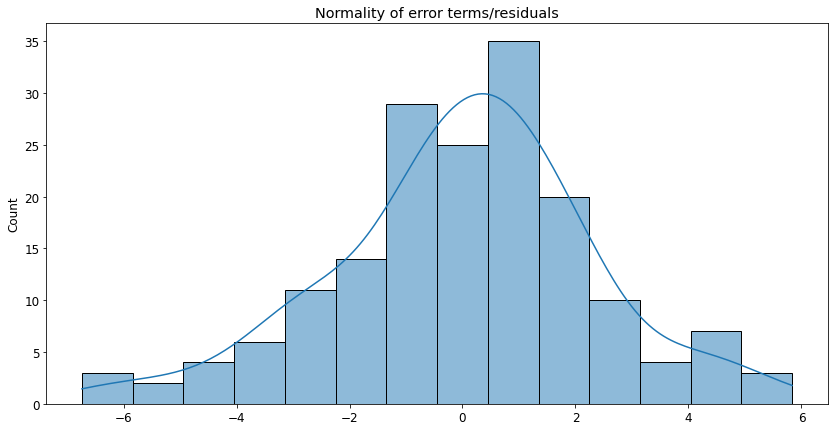

In [167]:
plt.figure(figsize=(14,7))
p = sns.histplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.show()

#### The Shapiro Wilkinson test is used to check the normality of the residuals. The test hypothesis is given as:
Ho: Residuals are normally distributed

H1: Residuals are not normally distributed

In [168]:
stat, p_value = shapiro(residuals)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.984764039516449
P-Value: 0.056141193956136703


#### The residual terms are normally distributed for the number of test points we took. According to CLT which says that as the sample size increases the distribution tends to be normal. A little skewness is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

## <a id="auto">5. No autocorrelation of residuals</a>

##### When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms and these more evident in time series data.

##### Autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

##### There should not be autocorrelation in the data so the error terms should not form any pattern.

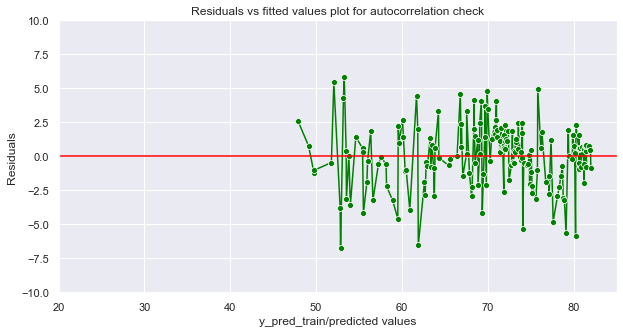

In [169]:
sns.set()
plt.figure(figsize=(10,5))
p=sns.lineplot(x=y_pred_train,y=residuals,marker='o',color='green')
plt.xlabel('y_pred_train/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(20,85)
p = sns.lineplot([20,90],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

## <a id="multico">6. No perfect multicollinearity</a>

##### In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. 

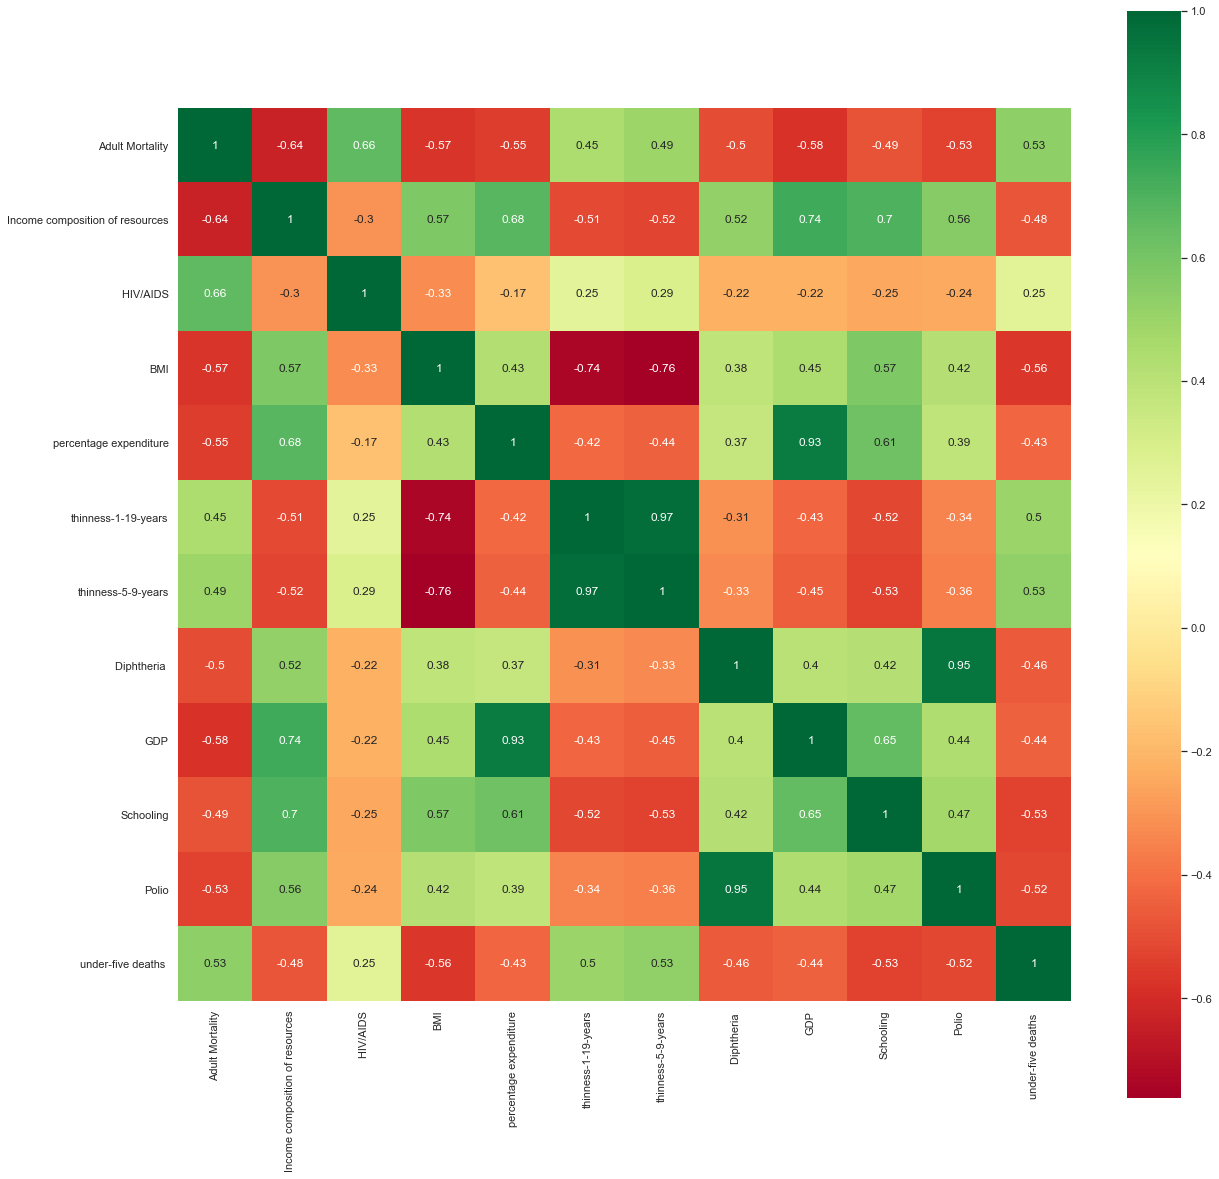

In [170]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(life[feat_importance.nlargest(12).index].corr(), annot=True,cmap='RdYlGn',square=True)

In [171]:
# the independent variables set
d = life[['Diphtheria ', 'under-five deaths ', 'thinness-5-9-years', 'GDP','Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI', 'Polio',
       'Total expenditure', ' HIV/AIDS', 'Population', 'thinness-1-19-years',
       'Income composition of resources', 'Schooling']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = d.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(d.values, i)
                          for i in range(len(d.columns))]
  

In [172]:
print(vif_data)

                            feature         VIF
0                       Diphtheria   252.648304
1                under-five deaths   157.023475
2                thinness-5-9-years   66.361623
3                               GDP   20.602622
4                   Adult Mortality   13.875734
5                     infant deaths  146.622258
6                           Alcohol    4.460486
7            percentage expenditure   14.066162
8                       Hepatitis B   75.768080
9                          Measles     3.877639
10                              BMI   18.515794
11                            Polio  322.101447
12                Total expenditure   16.779508
13                         HIV/AIDS    2.288388
14                       Population    1.527204
15              thinness-1-19-years   57.323143
16  Income composition of resources   49.264290
17                        Schooling   53.458136


<a id='optimization'></a>
### <b style="color:black">Model Pipeline & Optimization</b>


#### Evaluating Each Model and reporting the performance

In [173]:
num_folds = 10
num_instances = len(X_train)
seed = 40
scoring = 'r2'
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('ENET',ElasticNet()))
models.append(('RIDGE',Ridge()))

In [174]:
names = feat_importance.nlargest(12).index
scoring = 'r2'
results =[]
names =[]
for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,scoring=scoring,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) " %(name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.903067 (0.040520) 
LASSO: 0.594476 (0.052080) 
ENET: 0.385945 (0.061537) 
RIDGE: 0.906886 (0.041019) 


### Comparing the models

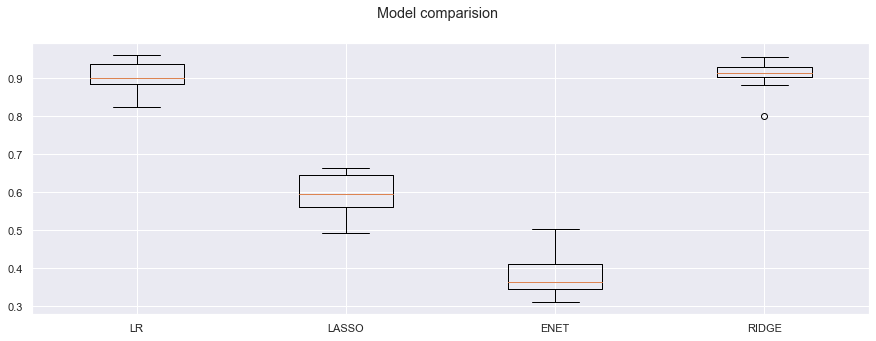

In [175]:
fig = plt.figure()
fig.suptitle('Model comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [176]:
# R2 score for Training data
lm = LinearRegression()
model = lm.fit(X_train,y_train)
prediction1=model.predict(X_train)
print('\033[1;44;46mTraining R2 Score: ',r2_score(y_train,prediction1))
accuracy = (explained_variance_score(y_train,prediction1)*100)
print('\033[1;44;46mAccuracy:',accuracy)
print("\033[1;44;46mIntercept: \033[0m",model.intercept_)
print("\033[1;44;46mCoefficients: \033[0m",model.coef_)

Training R2 Score:  0.9349138687196559
Accuracy: 93.49138687196559
Intercept:  63.57357235682148
Coefficients:  [-20.11815676   6.79237516  -6.65548657   2.22803395   2.15917556
   0.4474554   -0.65127488   7.72768094  -1.03471978   5.13270846
  -0.95307016  -1.31029739]


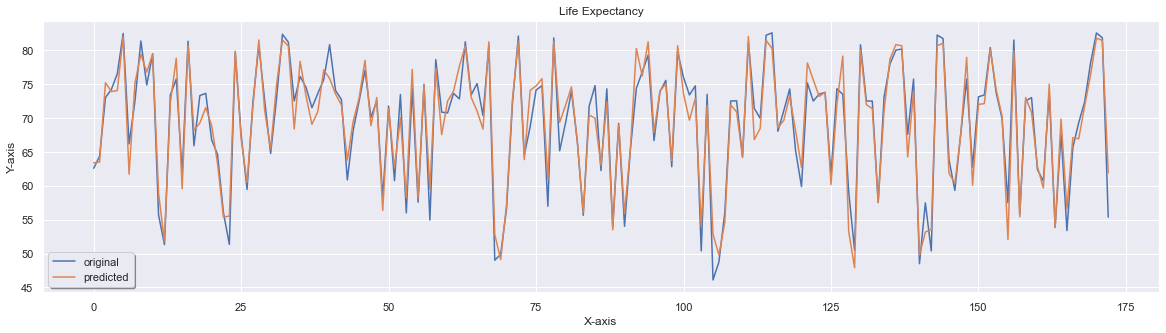

In [177]:
plt.figure(figsize=(20,5))
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, label="original")
plt.plot(x_ax, y_pred_train, label="predicted")
plt.title("Life Expectancy")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [178]:
# R2 score for Test data
prediction2=model.predict(X_test)
print('\033[1;44;46mTest data R2 Score: ',r2_score(y_test,prediction2))
acc = (explained_variance_score(y_test,prediction2)*100)
print("\033[1;44;46mAccuracy of test data prediction:",acc)

Test data R2 Score:  0.9139166613006179
Accuracy of test data prediction: 91.40123570903059


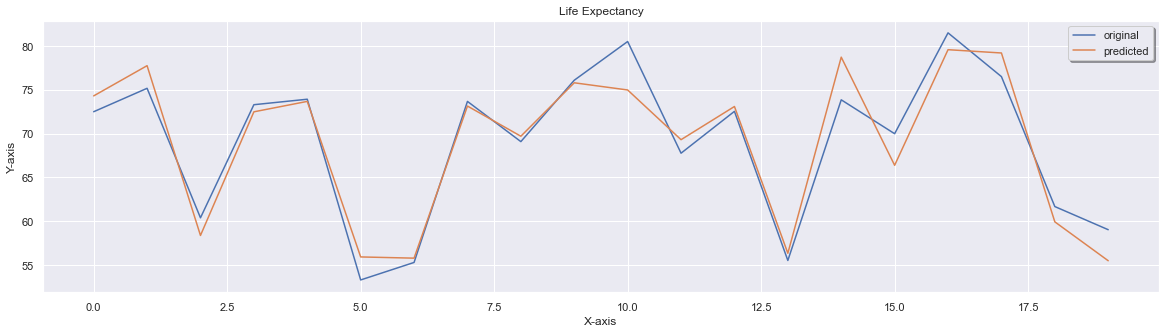

In [179]:
plt.figure(figsize=(20,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_test, label="predicted")
plt.title("Life Expectancy")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### <a id='metrics'></a> <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">Metrics

In [180]:
r2 = r2_score(y_test,prediction2)
print("r2 score of test data:",r2)

r2 score of test data: 0.9139166613006179


In [181]:
accuracy = (explained_variance_score(y_pred_test,prediction2)*100)
print("Accuracy of test predictions:",acc)

Accuracy of test predictions: 91.40123570903059


In [182]:
Adj_r2 = 1 - (1-r2_score(y_test,prediction2))*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)
print('Adjusted-r2:',Adj_r2)

Adjusted-r2: 0.7663452235302486


In [183]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE:  2.4437548990516214


In [184]:
print("MAE: ",np.sqrt(mean_absolute_error(y_test, y_pred_test)))

MAE:  1.3925886996146981


In [185]:
y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12 = sym.symbols('y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12')

### Putting the equation of y= a + (b0 * x1)+(b2 * x2)+...+(b11 * x12)

In [186]:

y= model.intercept_+ model.coef_[0]*x1+model.coef_[1]*x2+model.coef_[2]*x3+model.coef_[3]*x4+model.coef_[4]*x5+model.coef_[5]*x6+\
                   model.coef_[6]*x7+model.coef_[7]*x8+model.coef_[8]*x9+model.coef_[9]*x10+ \
                   model.coef_[10]*x11+model.coef_[11]*x12

In [187]:
print('y =',y)

y = -20.1181567599918*x1 + 5.13270846164284*x10 - 0.95307016099541*x11 - 1.31029738842055*x12 + 6.79237515867281*x2 - 6.65548656787049*x3 + 2.22803395391788*x4 + 2.15917555953379*x5 + 0.44745540178449*x6 - 0.651274878722973*x7 + 7.72768093814975*x8 - 1.03471978130444*x9 + 63.5735723568215


#### Interpretation of coeffcients/weights of the independent variables which has impact on life expectancy of the population in the country:

1. Adult Mortality	
2. Income composition of resources	
3. HIV/AIDS	
4. BMI	
5. thinness-5-9-years	
6. percentage expenditure	
7. thinness-1-19-years	
8. Polio	
9. GDP	
10. under-five deaths	
11. Schooling	
12. Diphtheria

### <a id='deploy'></a> <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;"> Deployment

#### <a id='flask'></a> <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;"> Using Flask

In [188]:
import pickle
filename ='lin_reg.pkl'
filescaler = 'scaler.pkl'

In [189]:
pickle.dump(model,open('lin_reg.pkl', 'wb'))

In [190]:
pickle.dump(min_max_sc, open(filescaler, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

AdultMor = 263
Income= 0.479
HIV=0.1
BMI=19.1
Per_expenditure=71.27962362
Thinness5_9=17.3
GDP =584.25921
school=10.1
Diphtheria=65
polio=6
under_5=83
thinness1_19=17.2


X_scaled = scaler.transform([[AdultMor,Income,HIV,BMI,Thinness5_9,Per_expenditure,thinness1_19,polio,GDP,under_5,school,Diphtheria]])
result = loaded_model.predict(X_scaled)
print("The expected life expectancy is:",result[0])

#### <a id='cloud'></a> <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">Into Cloud (MS Azure)

#### (Refer the MS Azure platform - Deployment using GitHuB)